In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import healpy.rotator as hpr
import healpy.pixelfunc as hpf
import healpy.visufunc as hpv
import astropy as ap
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import sys

# NSIDE=32
# m=np.arange(hp.nside2npix(NSIDE))
# print m.shape, m[0:10], m[m.shape[0]-10:m.shape[0]]
# hp.mollview(m, title="Test")

In [2]:
from HERA_MapMaking_VisibilitySimulation import DATA_PATH
print (DATA_PATH)

pyuvdata: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation
version_file: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/VERSION
version: 1.0.0
Exception: git_version.
Programme Starts at: 2018-09-05 12:07:43.219997
/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data


In [3]:
outfile_GSM_name = DATA_PATH + '/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits'
map_1 = fits.getdata(outfile_GSM_name).squeeze()
%matplotlib inline

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -139.58774575294163 1084.8540418213663
STD of the Map32-wholeday without Fornax A: 30.5973010187


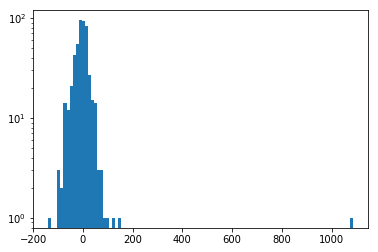

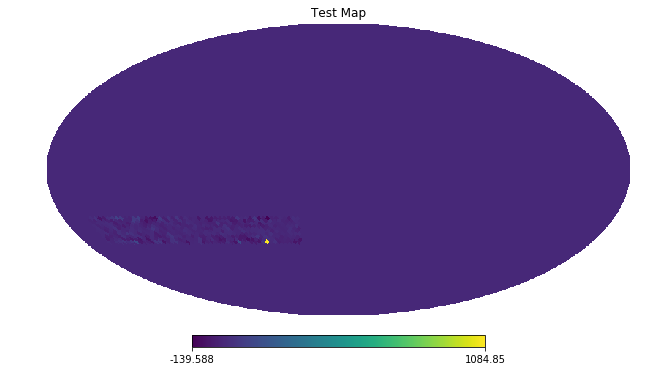

In [4]:
# hdul = fits.open('test.fits')
hdul = fits.open(outfile_GSM_name)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
print 'Data shape, min, max: ',data.shape, min(data), max(data)
map_fit = fits.getdata(outfile_GSM_name)
print('STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
plt.hist(map_fit[np.abs(map_fit) > 10.**(-5)],bins=100, log=True)
hdul.close()
hp.mollview(map_fit, nest=True, title="Test Map")
plt.show()
plt.close()

In [5]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(outfile_GSM_name).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))





Bright_Pixels_Data: [[-35.68533471 -25.94447977 -30.         -32.7971683  -32.7971683
  -32.7971683  -27.27961274 -27.27961274 -30.         -31.38816646
  -25.94447977 -28.63098984 -32.7971683  -37.16889966 -34.22886633
  -28.63098984 -32.7971683  -32.7971683  -31.38816646 -27.27961274
  -30.         -27.27961274 -35.68533471 -30.         -32.7971683
  -30.         -31.38816646 -31.38816646 -31.38816646 -32.7971683
  -32.7971683  -27.27961274 -31.38816646 -35.68533471 -35.68533471
  -24.62431835 -27.27961274 -31.38816646 -24.62431835 -35.68533471
  -30.         -24.62431835 -31.38816646 -31.38816646 -34.22886633
  -30.         -24.62431835 -32.7971683  -34.22886633 -31.38816646
  -30.         -31.38816646 -28.63098984 -24.62431835 -34.22886633
  -32.7971683  -37.16889966 -28.63098984 -27.27961274 -27.27961274
  -25.94447977 -27.27961274 -31.38816646 -31.38816646 -28.63098984
  -34.22886633 -31.38816646 -27.27961274 -32.7971683  -24.62431835
  -37.16889966 -25.94447977 -25.94447977 -25.

In [6]:
# hp.cartview(testmap, title="Test Map", norm='log', min=10, max=1250, coord='C', latra=[-50,-10],xsize=360, nest=True)
# hp.graticule(dpar=10,dmer=10)

In [7]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [8]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.050119-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [9]:
# filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [10]:
filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.050119-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [11]:
filenames_32_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [12]:
filenames_64_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [13]:
filenames_32_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [14]:
filenames_64_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [15]:
filenames_64[0].split('/')[-1]

'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.050119-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits'

In [16]:
sys.stdout.flush()

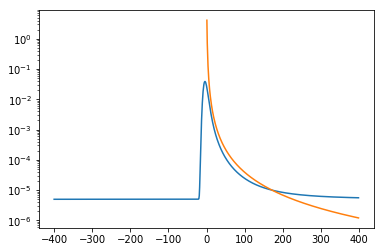

In [106]:
from scipy.fftpack import fft, ifft
num_input = 100001
scale_input = 1
num_plot = 800
sky_ratio = 1./(12*32**2)
# ift = num_input * 1./(2*np.pi)**0.5 * ifft(np.exp(16000*sky_ratio*np.pi*2.3478136461808763 * (- np.arange(0, 2*np.pi*scale_input, 2*scale_input*np.pi/num_input) * 1j) ** 1.51))
ift = ifft(np.exp(16000*sky_ratio*np.pi*2.3478136461808763 * (- np.arange(0, 2*np.pi*scale_input, 2*scale_input*np.pi/num_input) * 1j) ** 1.51))
# ift = num_input * 1./(2*np.pi)**0.5 * ifft(np.exp(16000*sky_ratio*np.pi*2.3478136461808763 * (- np.arange(num_input) * 1j) ** 1.51))
ft = 1./num_input * fft(np.exp(16000*sky_ratio*np.pi*2.3478136461808763 * (- np.arange(0, 2*scale_input*np.pi, 2*scale_input*np.pi/num_input) * 1j) ** 1.51))
# np.fft.fft(ift)
# plt.plot(np.arange(-0.5*num_input, 0.5*num_input,1), ift[np.arange(-num_input/2, num_input/2, 1)])
plt.plot(np.arange(-num_plot/2, num_plot/2,1), ft[np.arange(-num_plot/2, num_plot/2, 1)])
plt.plot(np.arange(1, num_plot/2, 1), 16000*sky_ratio*np.pi*np.arange(1, num_plot/2, 1)**(-2.51))
plt.yscale('log')
plt.show()

(0, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.050119-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 451.815980696
>>>>>>>> Maximum in the Map: 11968.7384261
>>>>>>>> Number of Valid Pixels: 974
110.1074MHz


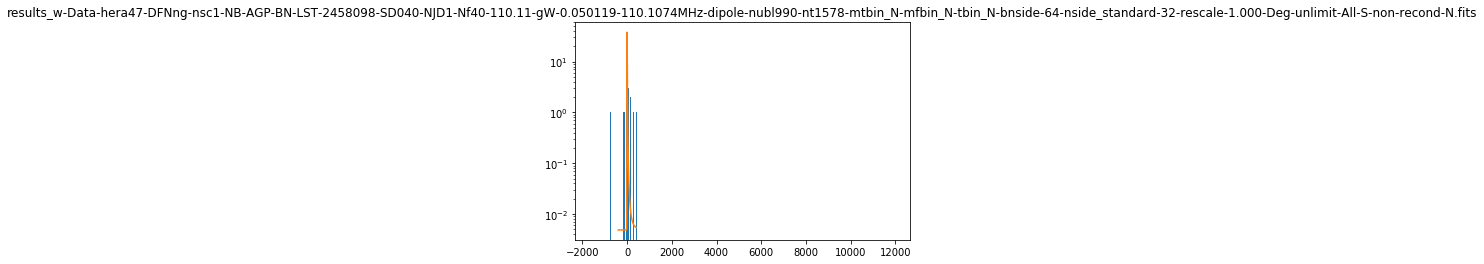

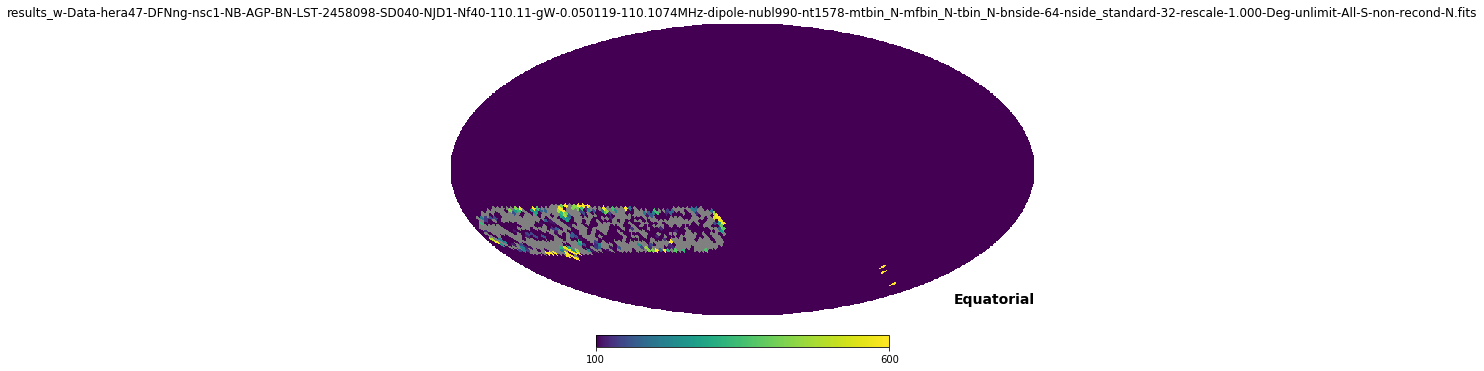

(1, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-114.79-gW-0.050119-114.7949MHz-dipole-nubl990-nt1567-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 612.480401232
>>>>>>>> Maximum in the Map: 14362.7402058
>>>>>>>> Number of Valid Pixels: 922
114.7949MHz


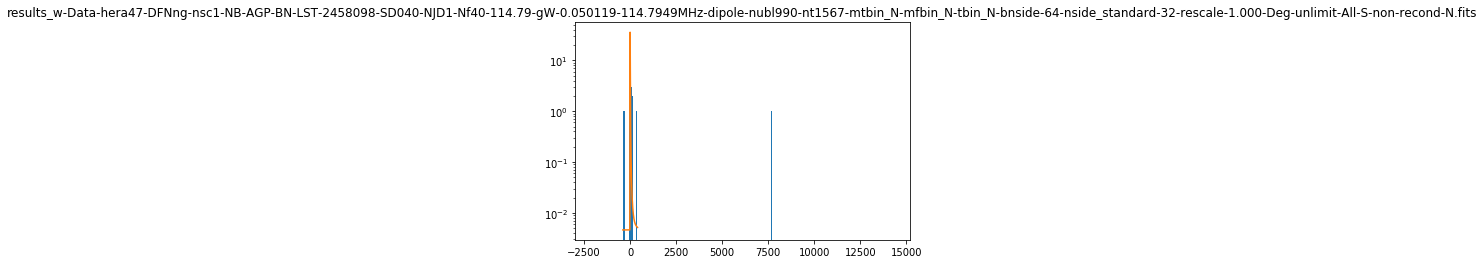

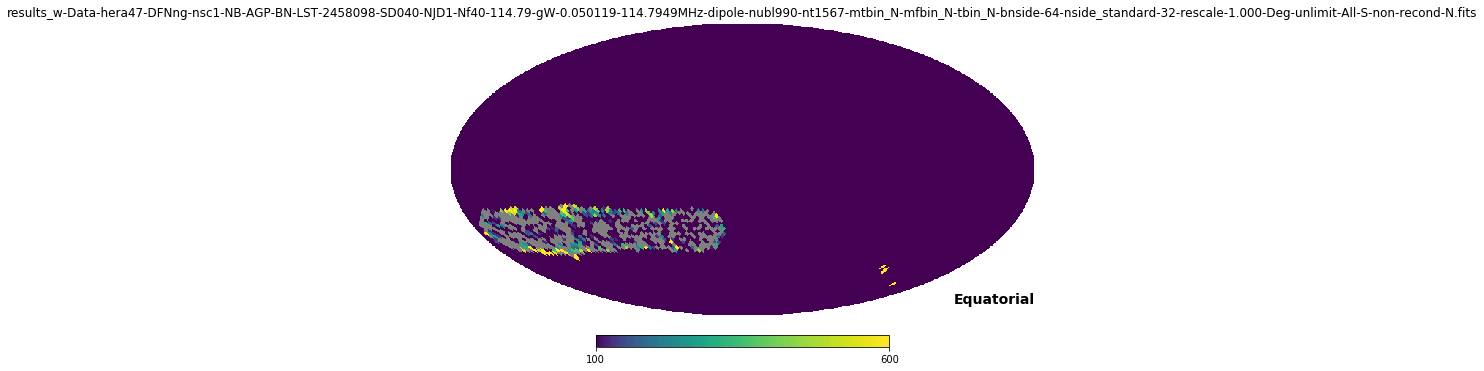

(2, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.050119-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 321.10294264
>>>>>>>> Maximum in the Map: 4052.95130397
>>>>>>>> Number of Valid Pixels: 789
119.4824MHz


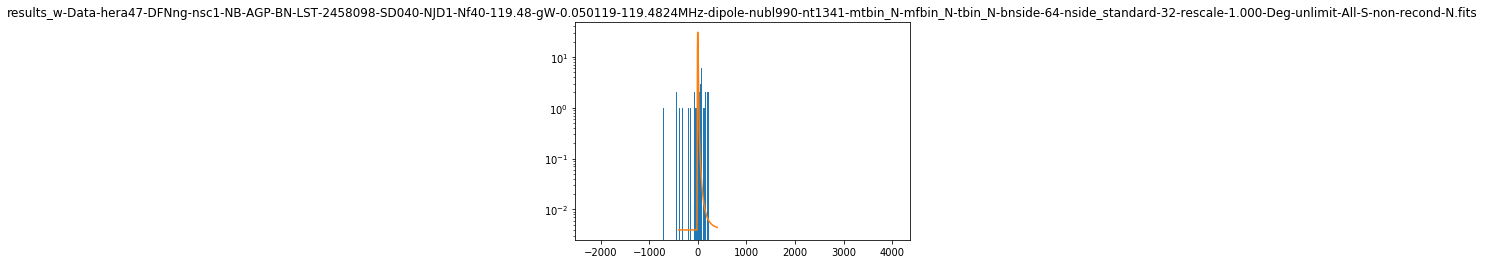

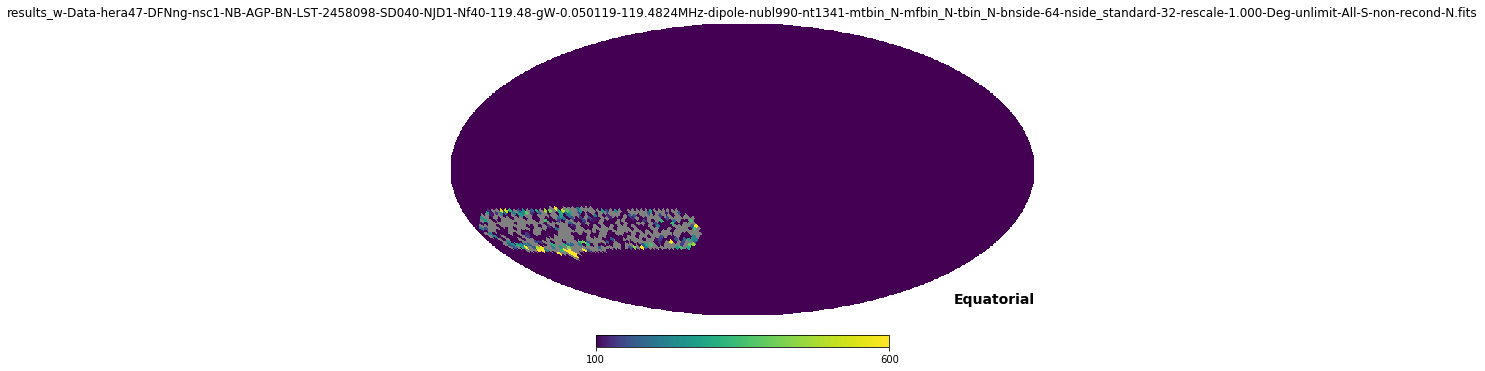

(3, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-125.73-gW-0.050119-125.7324MHz-dipole-nubl990-nt1173-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 274.948043148
>>>>>>>> Maximum in the Map: 3525.74950258
>>>>>>>> Number of Valid Pixels: 650
125.7324MHz


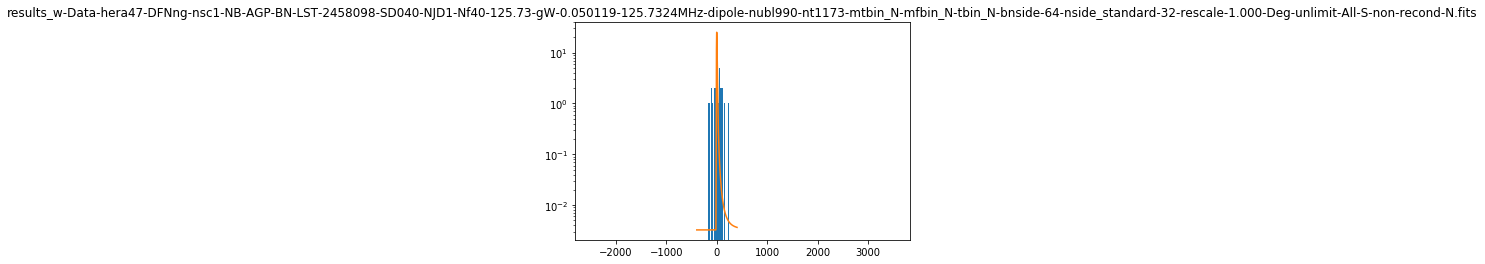

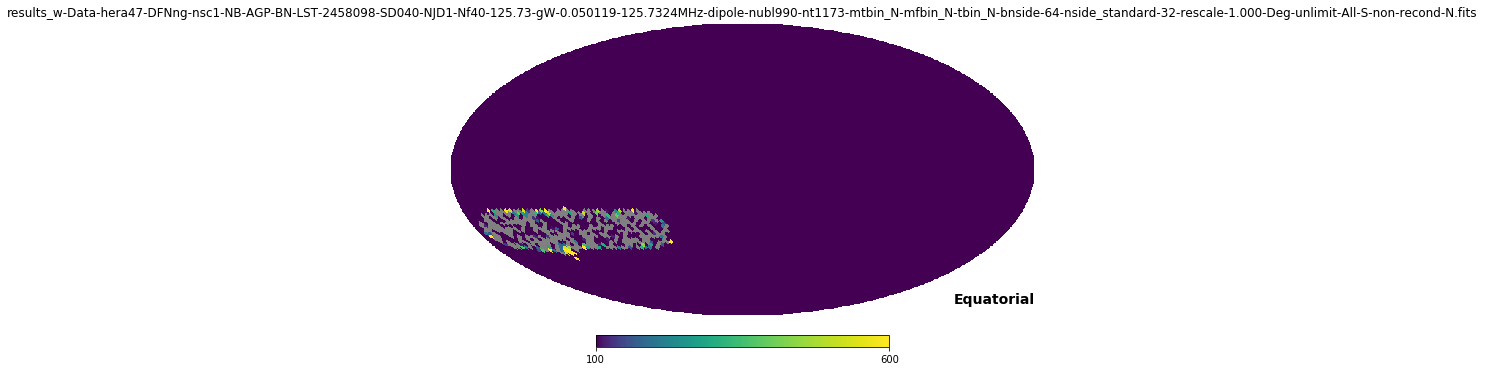

(4, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.050119-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 166.890587967
>>>>>>>> Maximum in the Map: 2291.09251107
>>>>>>>> Number of Valid Pixels: 825
130.4199MHz


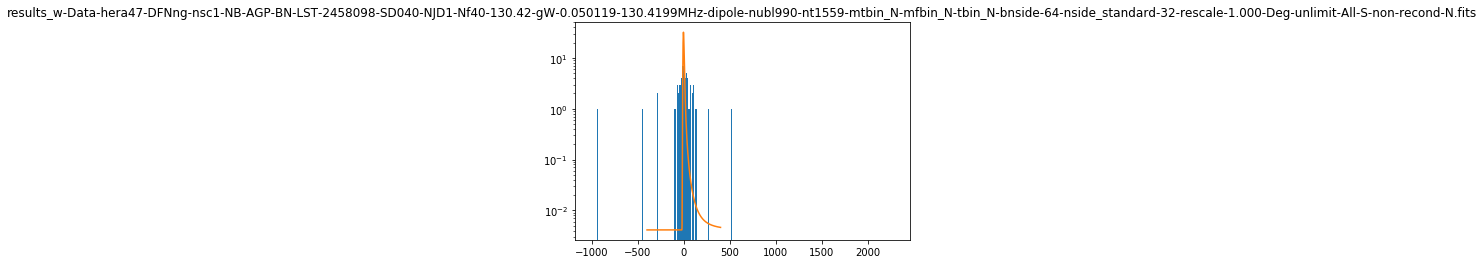

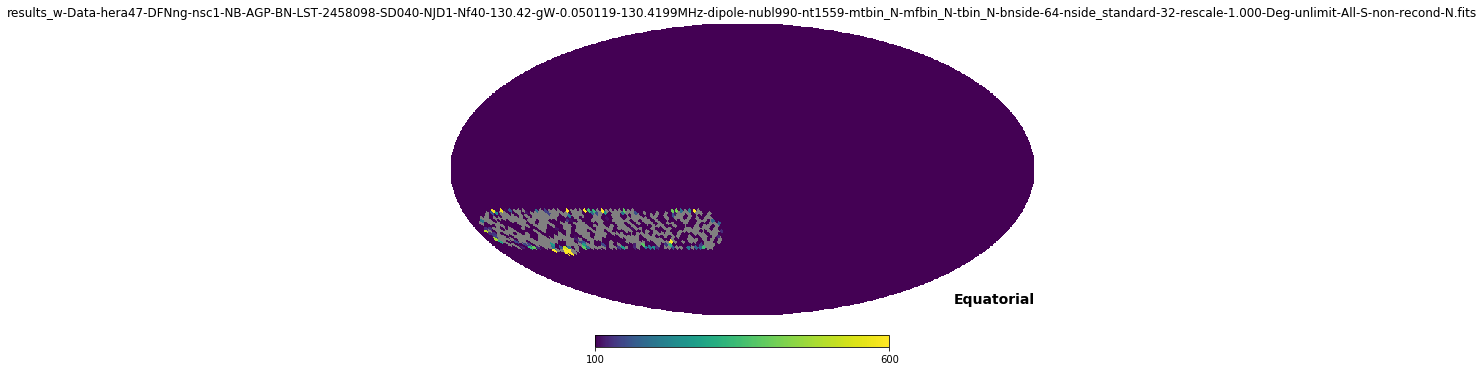

(5, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-135.11-gW-0.050119-135.1074MHz-dipole-nubl990-nt1577-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 117.726732596
>>>>>>>> Maximum in the Map: 1711.98081801
>>>>>>>> Number of Valid Pixels: 804
135.1074MHz


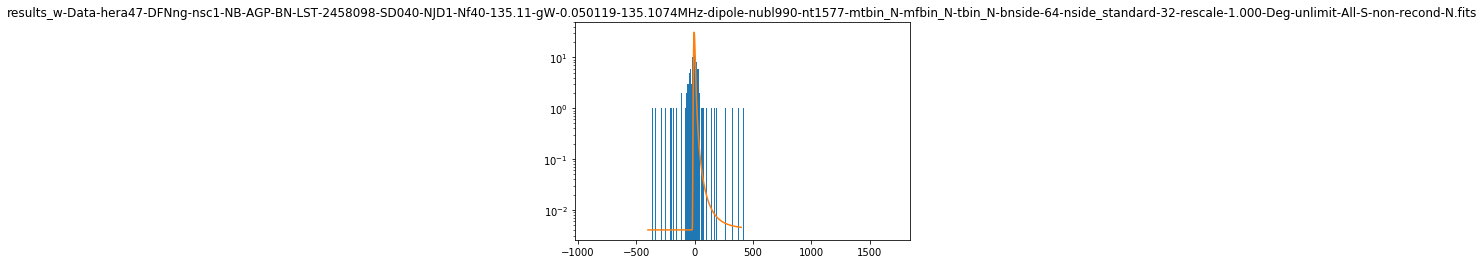

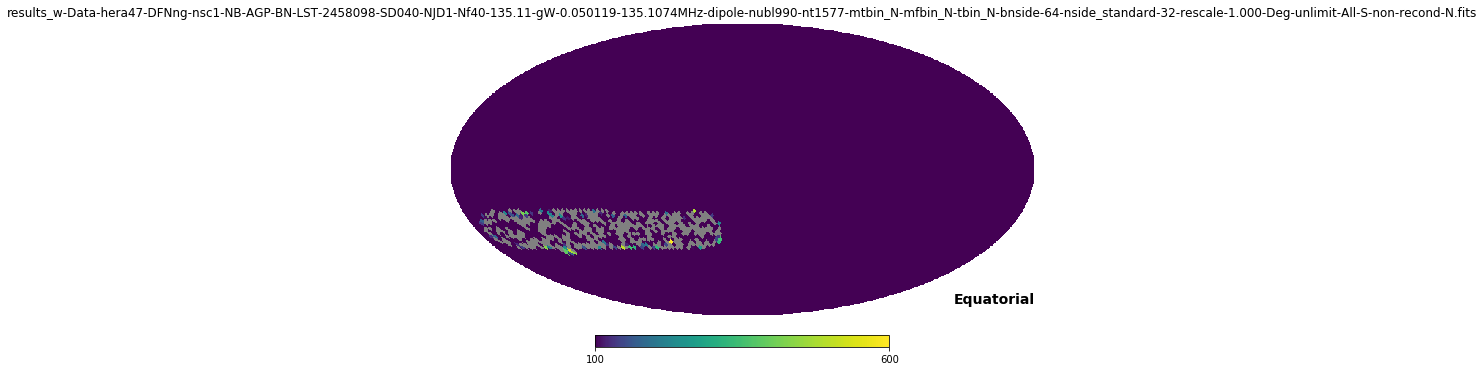

(6, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.050119-139.7949MHz-dipole-nubl990-nt1579-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 173.315922147
>>>>>>>> Maximum in the Map: 3515.24772355
>>>>>>>> Number of Valid Pixels: 775
139.7949MHz


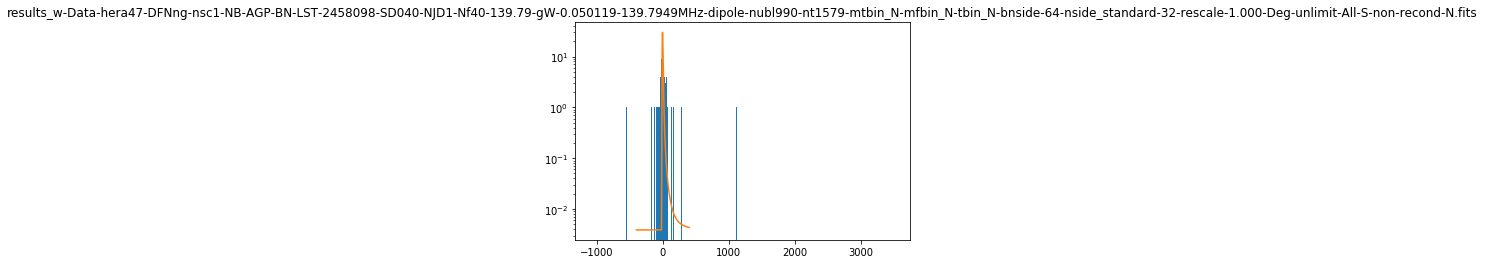

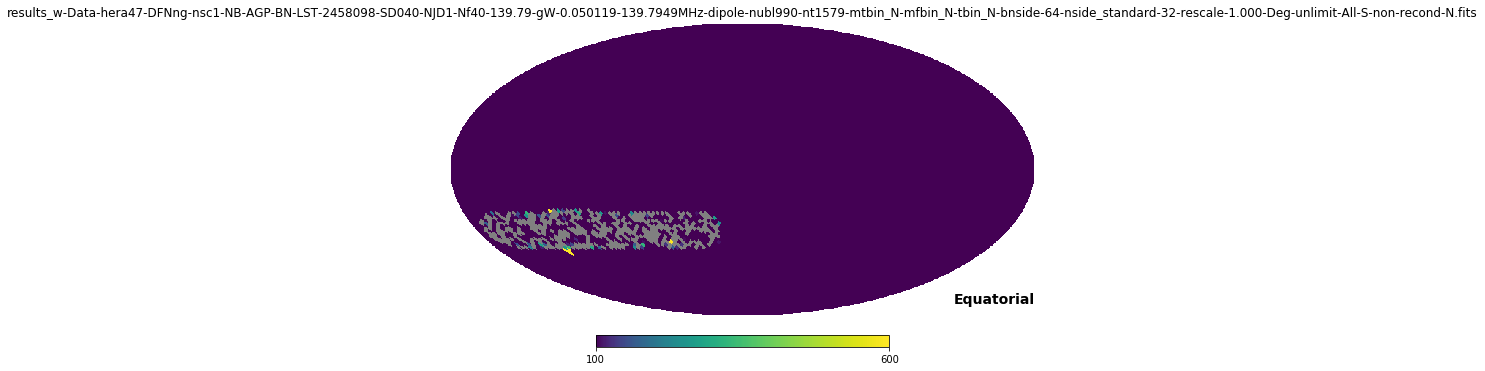

(7, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-144.48-gW-0.050119-144.4824MHz-dipole-nubl990-nt1574-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 134.38781307
>>>>>>>> Maximum in the Map: 1294.6898538
>>>>>>>> Number of Valid Pixels: 721
144.4824MHz


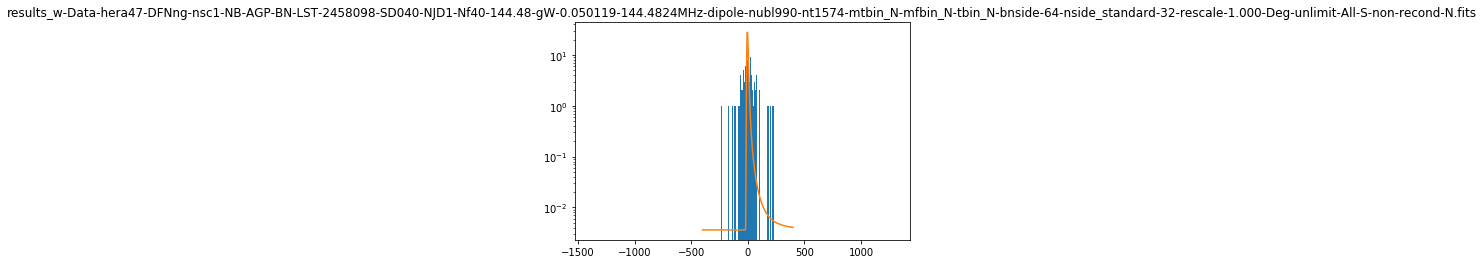

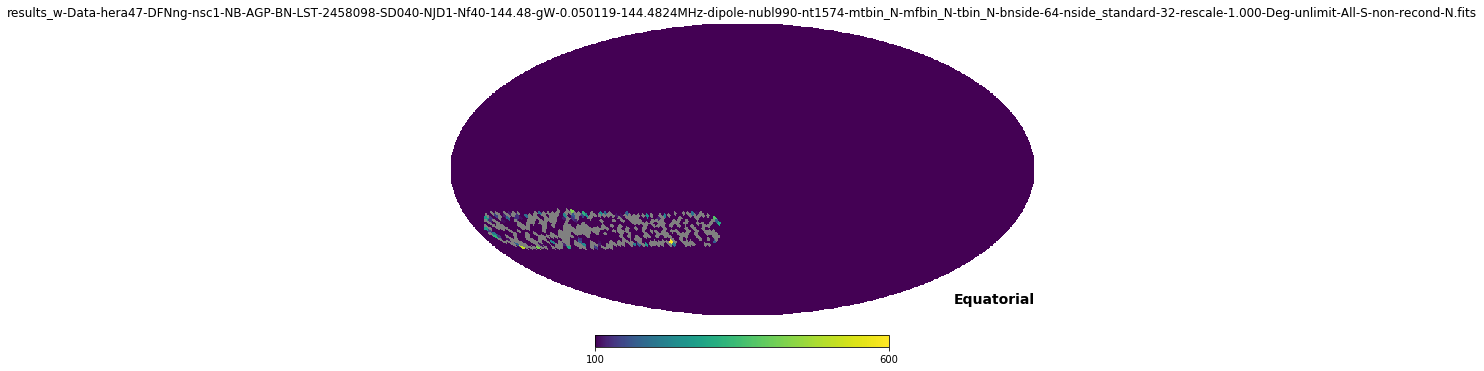

(8, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.050119-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 95.9123835616
>>>>>>>> Maximum in the Map: 1019.55531256
>>>>>>>> Number of Valid Pixels: 701
150.7324MHz


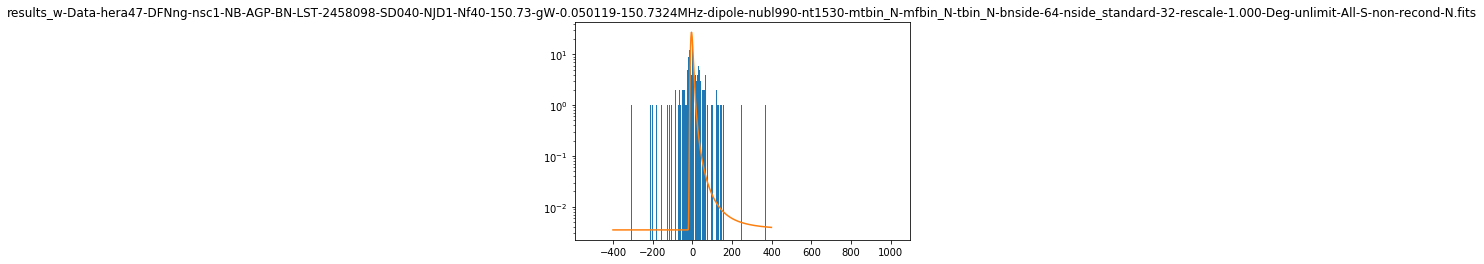

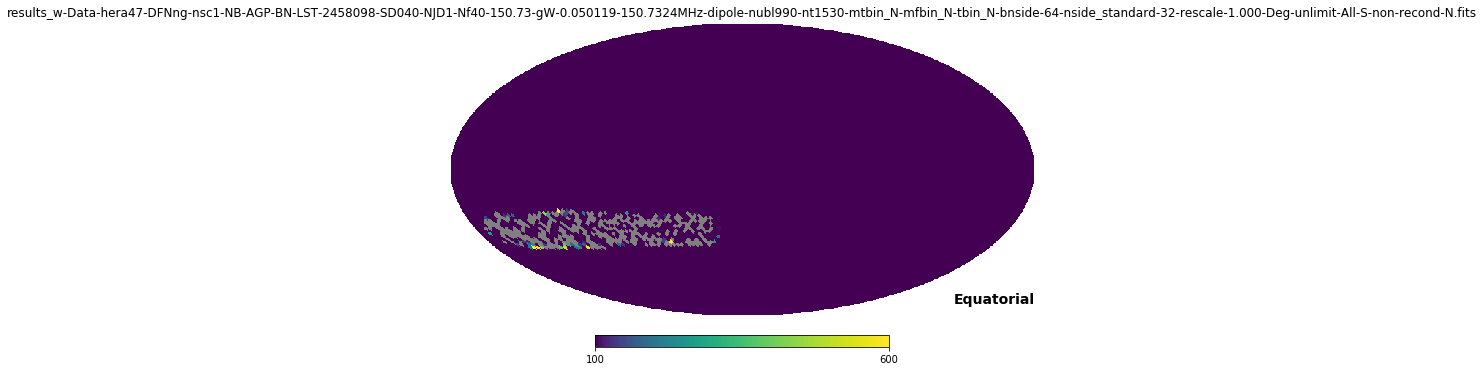

(9, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-155.42-gW-0.050119-155.4199MHz-dipole-nubl990-nt1540-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 106.871512858
>>>>>>>> Maximum in the Map: 942.189918814
>>>>>>>> Number of Valid Pixels: 696
155.4199MHz


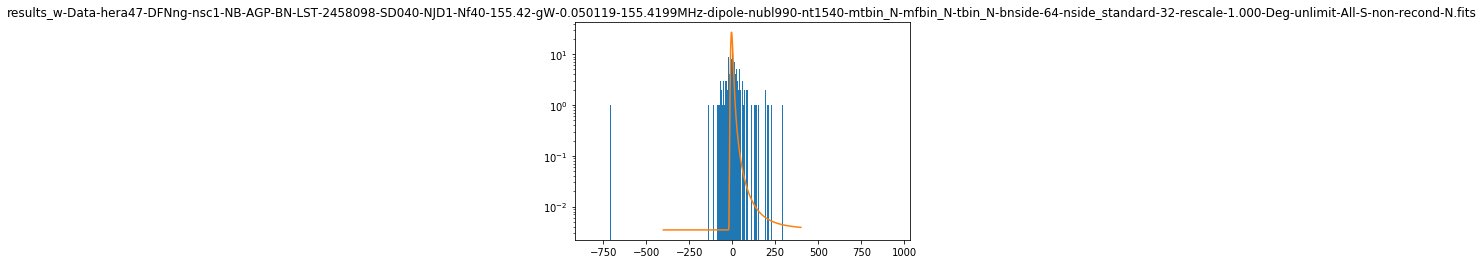

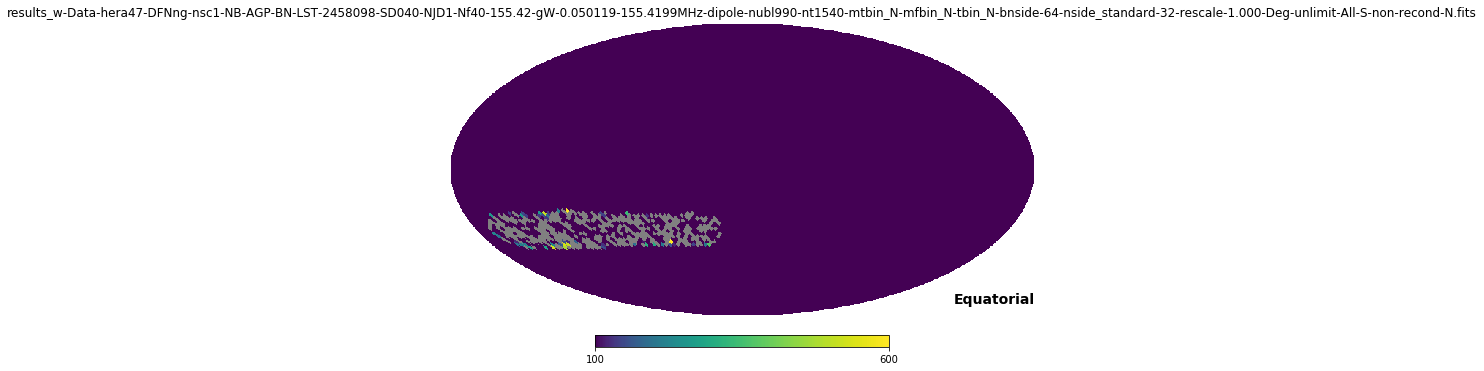

(10, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-160.11-gW-0.050119-160.1074MHz-dipole-nubl990-nt1577-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 110.913496117
>>>>>>>> Maximum in the Map: 845.559354434
>>>>>>>> Number of Valid Pixels: 705
160.1074MHz


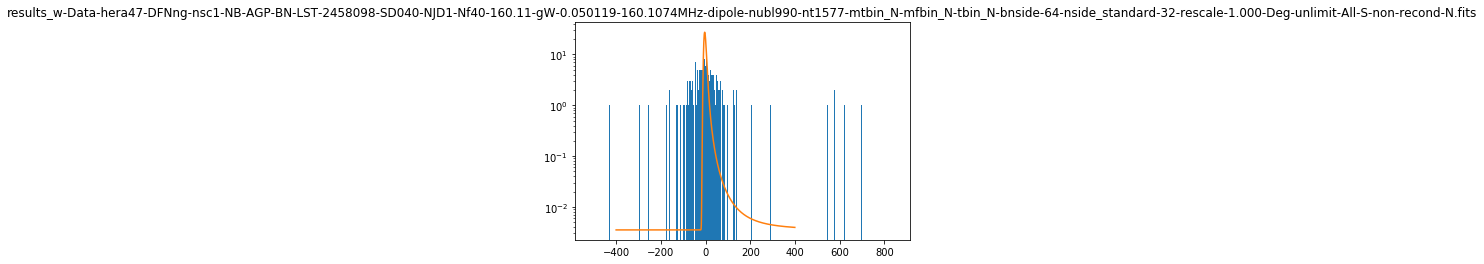

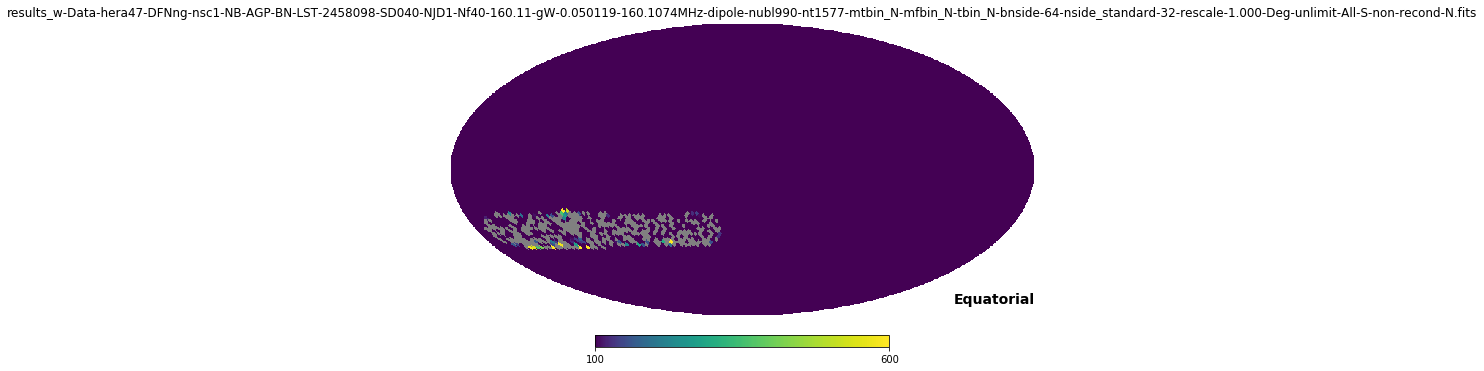

(11, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-164.79-gW-0.050119-164.7949MHz-dipole-nubl990-nt1581-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 102.559244534
>>>>>>>> Maximum in the Map: 1125.71001305
>>>>>>>> Number of Valid Pixels: 688
164.7949MHz


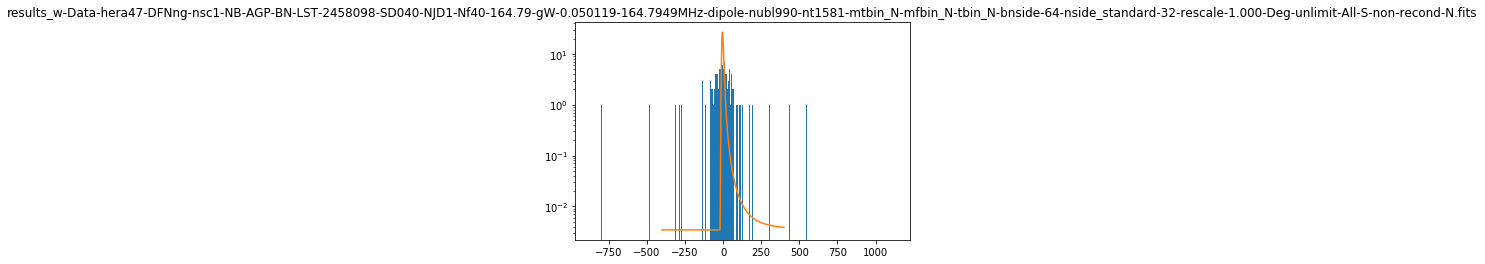

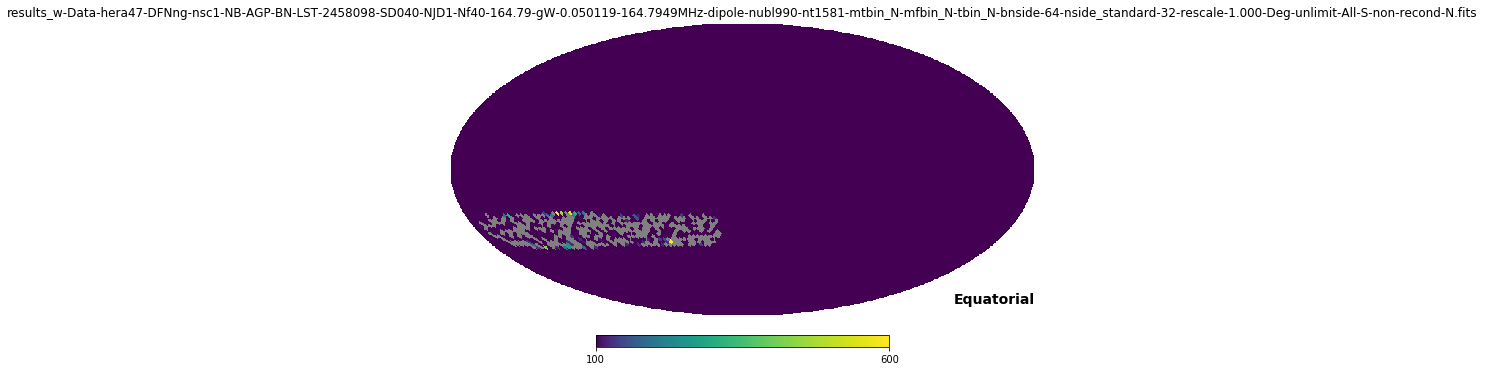

(12, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-171.04-gW-0.050119-171.0449MHz-dipole-nubl990-nt1533-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 86.0145429983
>>>>>>>> Maximum in the Map: 977.920843904
>>>>>>>> Number of Valid Pixels: 644
171.0449MHz


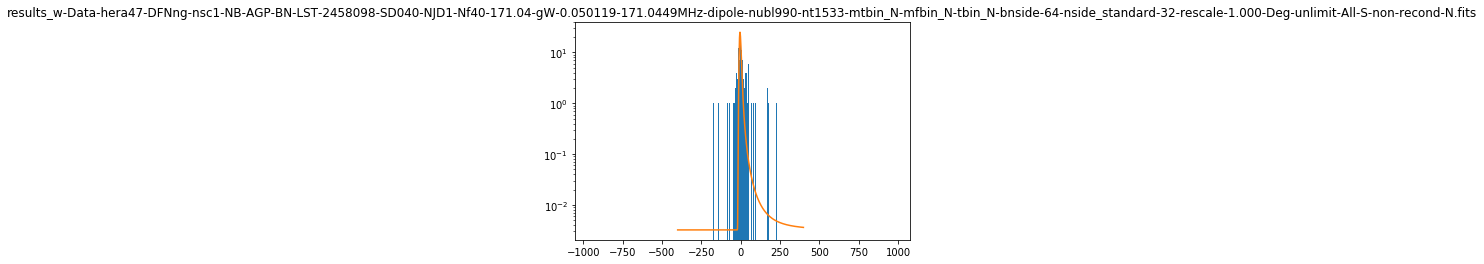

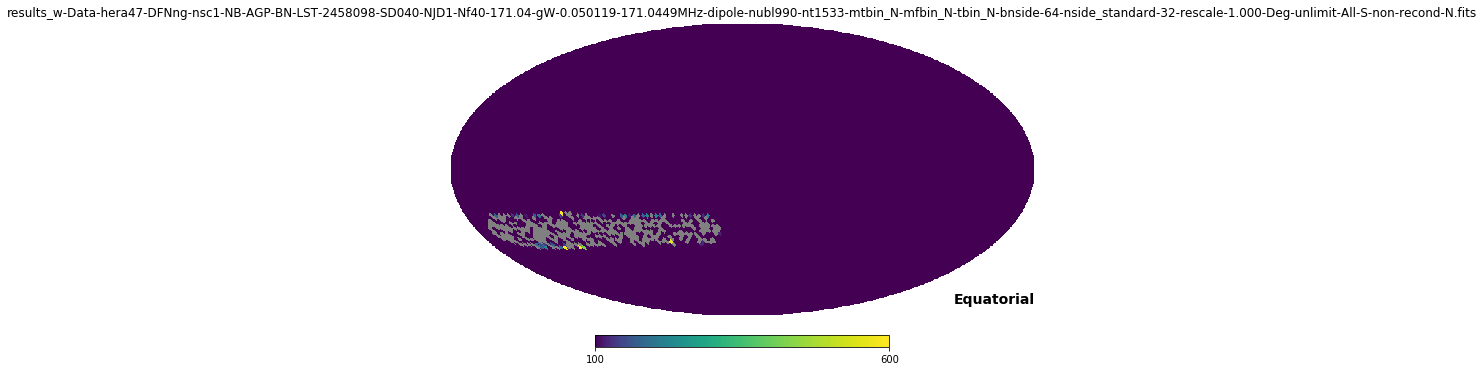

(13, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-174.17-gW-0.050119-174.1699MHz-dipole-nubl990-nt1383-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 70.7144766129
>>>>>>>> Maximum in the Map: 661.269408621
>>>>>>>> Number of Valid Pixels: 587
174.1699MHz


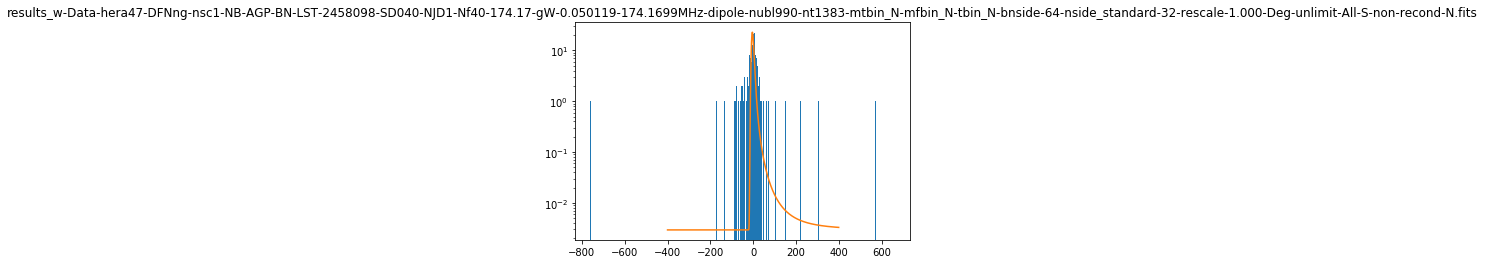

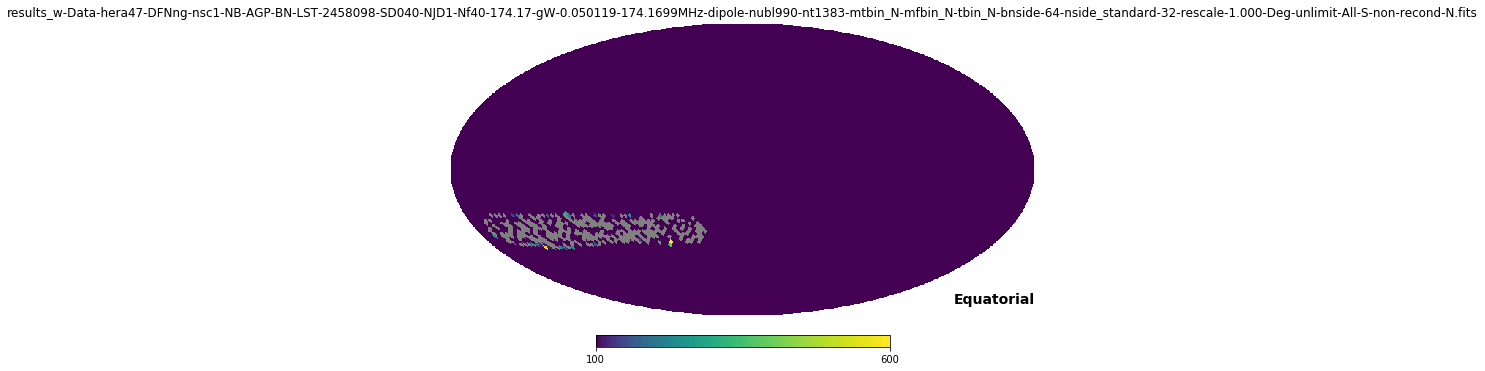

(14, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-178.86-gW-0.050119-178.8574MHz-dipole-nubl990-nt1435-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 75.6402992861
>>>>>>>> Maximum in the Map: 589.522126344
>>>>>>>> Number of Valid Pixels: 613
178.8574MHz


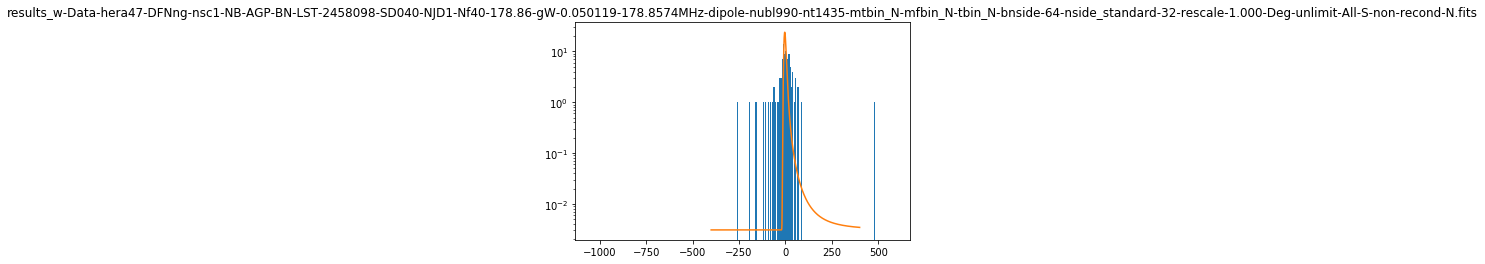

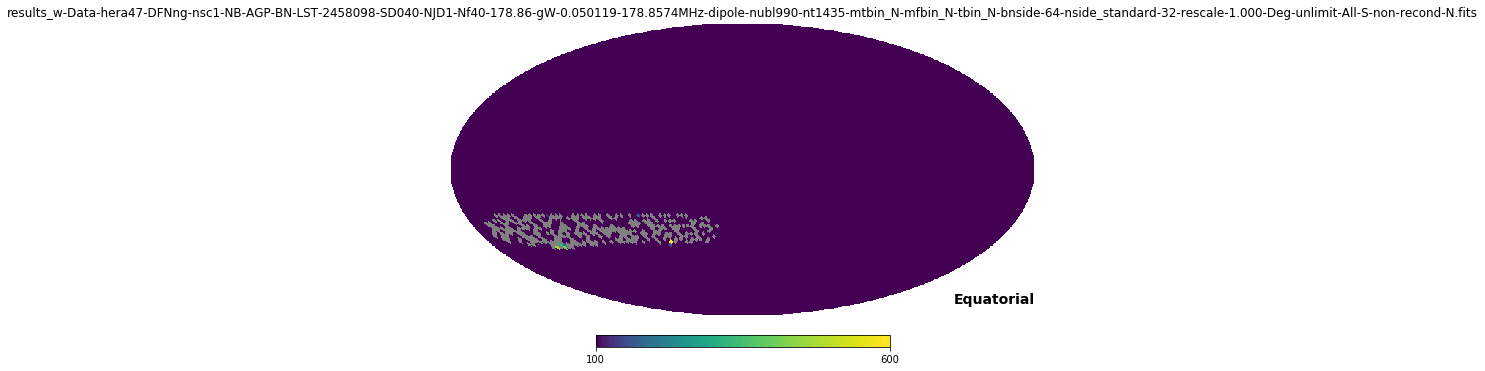

(15, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-185.11-gW-0.050119-185.1074MHz-dipole-nubl990-nt1415-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 55.9841894791
>>>>>>>> Maximum in the Map: 437.439133974
>>>>>>>> Number of Valid Pixels: 604
185.1074MHz


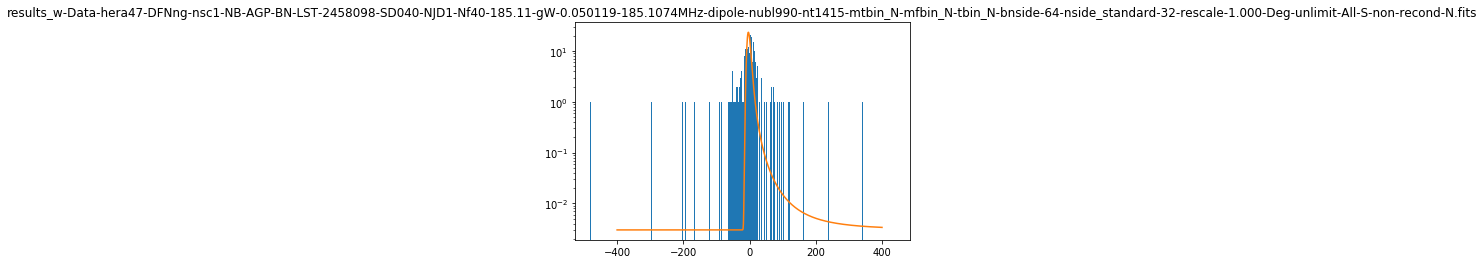

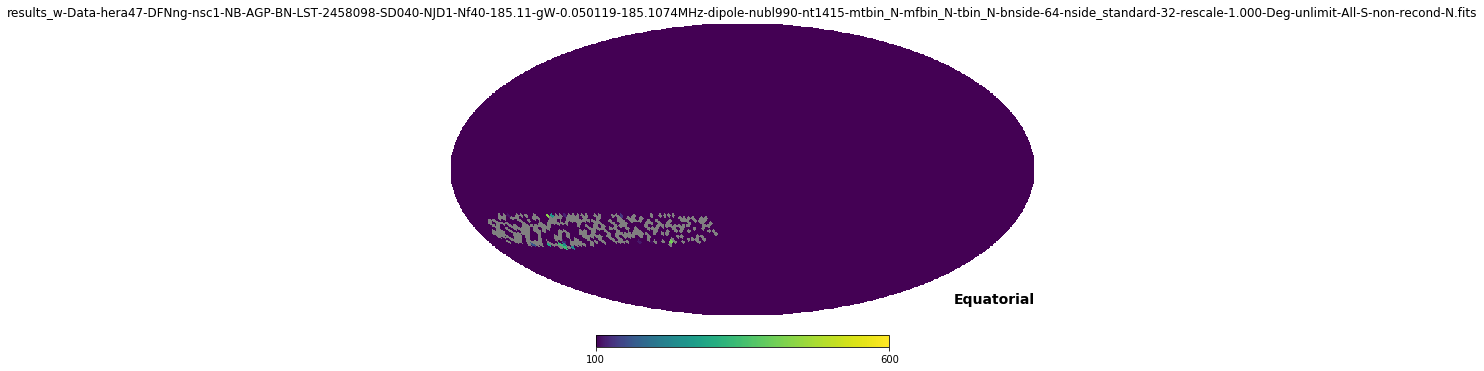

(16, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-186.67-gW-0.050119-186.6699MHz-dipole-nubl990-nt948-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 50.1799591655
>>>>>>>> Maximum in the Map: 969.28821607
>>>>>>>> Number of Valid Pixels: 441
186.6699MHz


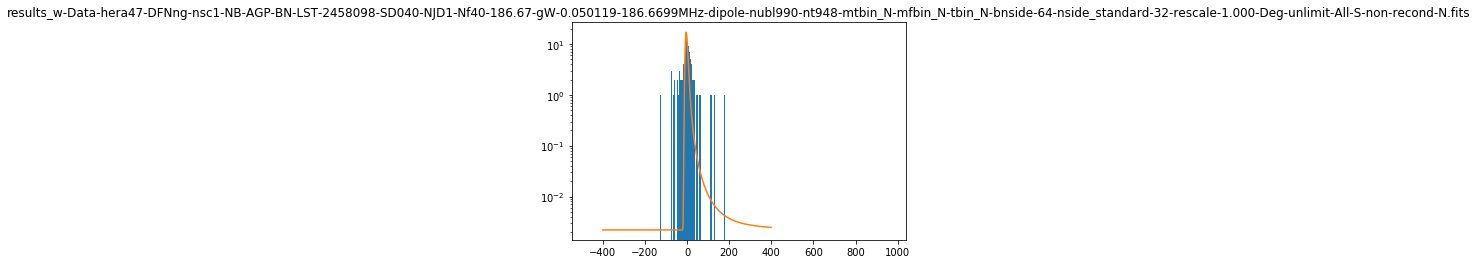

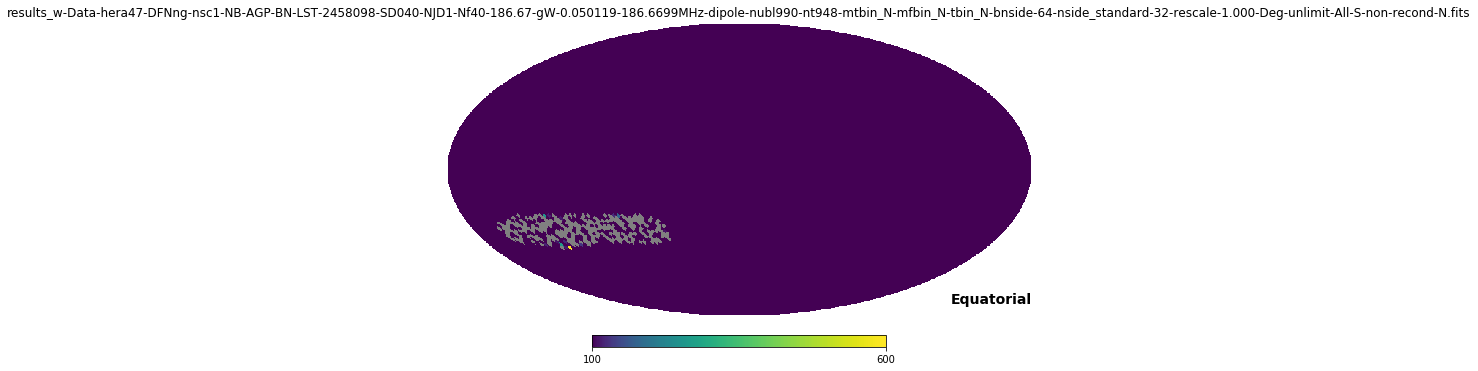

In [111]:
sys.stdout.flush()
bin_width = 1
maps_mfreq = []
freqs_common_32 = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 250:
        maps_mfreq.append(map_fit)
        for string_piece in name.split('-'):
            if 'MHz' in string_piece:
                freqs_common_32.append(float(string_piece[:-3]))
                print(string_piece)
    
    plt.figure(10000 + id_file)
#     plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=np.arange(map_fit[np.abs(map_fit) > 10**(-5)].min(), map_fit[np.abs(map_fit) > 10**(-5)].max(), bin_width), log=True)
    plt.plot(np.arange(-num_plot/2, num_plot/2,1), bin_width * len(map_fit[np.abs(map_fit) > 10**(-5)]) * ft[np.arange(-num_plot/2, num_plot/2, 1)])
    plt.yscale('log')
    plt.title(name)
    plt.show()
    plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    plt.close()
    

In [44]:
4000*27**(-2.51)

1.0217318773492081

In [20]:
num_test = 100
scale_test = 10
test1 = np.exp(np.arange(num_test) * 2*np.pi*scale_test/num_test * 1j)
test1_fft = fft(test1)
test1_fft_ifft = ifft(test1_fft)
print(test1_fft)
print(np.abs(test1_fft_ifft - test1).max())

[-1.03250741e-14+5.88758350e-15j  1.31845400e-14-1.21748919e-14j
 -2.77555756e-14+5.42988840e-15j  8.49970670e-16-5.61074826e-15j
  1.18476637e-15+2.42973638e-14j -1.28082040e-14+4.02339655e-15j
 -4.73731515e-14-6.96957750e-15j  1.31812785e-14-7.77894790e-15j
 -2.74406670e-14+1.66716513e-14j -4.12899160e-14-1.40335028e-14j
  1.00000000e+02-1.34882302e-13j  4.11838044e-14-1.44484550e-14j
  2.65484510e-14+1.56683741e-14j -1.28031322e-14-6.98072168e-15j
  5.03037393e-14-1.06833741e-14j  1.28373855e-14+4.37476448e-15j
 -1.02318871e-15+2.39980289e-14j -1.08543692e-15-5.44979974e-15j
  2.88136983e-14+6.19255611e-15j -1.38939001e-14-1.22000034e-14j
  1.07720463e-14+5.38988733e-15j  1.84380689e-14+1.13019739e-15j
  1.47933095e-14+2.66027792e-14j -7.77302592e-15+1.37013228e-14j
 -8.34341159e-15-1.04661654e-14j  1.30972302e-14+1.39118025e-15j
  3.15659141e-14+1.36550623e-14j  1.60498418e-14+1.81193853e-14j
 -3.53655775e-15+3.98887018e-14j -3.47972675e-14+2.22796784e-14j
 -1.65535271e-14-2.124376

In [21]:
np.exp(2.3478136461808763 * (- np.arange(0, 2*np.pi, 2*np.pi/num_input) * 1j) ** 1.51).sum()

(21362.57468488439-11941.452423009508j)

In [55]:
maps_mfreq_32 = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
#     print(id_file, name)[]
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 250.:
        maps_mfreq_32.append(map_fit)
        
maps_mfreq_32 = np.array(maps_mfreq_32)
commom_vp_mask_32 = np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32 = maps_mfreq_32[:, commom_vp_mask_32]
print('maps_mfreq_32 shape: {}'.format(maps_mfreq_32.shape))
print('maps_mfreq_common_32 shape: {}'.format(maps_mfreq_common_32.shape))
print('Number of Common Valid Pixels-32: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32.T)
maps_mfreq_common_32_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_eigValues =  pca.explained_variance_
# maps_mfreq_common_32_eigValues = pca.singular_values_
maps_mfreq_common_32_eigVectors = pca.components_
maps_mfreq_common_32_newspace = pca.fit_transform(maps_mfreq_common_32.T)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_newspace.shape))
print('Maps32_Common_NewSpace: {}\n'.format(maps_mfreq_common_32_newspace))

maps_mfreq_common_32_reconstruct = np.dot(maps_mfreq_common_32_newspace, maps_mfreq_common_32_eigVectors).T
print('Shape of maps_mfreq_common_32_reconstruct:{}\n'.format(maps_mfreq_common_32_reconstruct.shape))
Discrepancy_reconstruct_32 = maps_mfreq_common_32 - maps_mfreq_common_32_reconstruct
Discrepancy_reconstruct_ratio_32 = np.linalg.norm(Discrepancy_reconstruct_32, axis=1) / np.linalg.norm(maps_mfreq_common_32, axis=1)
print('Discrepancy_reconstruct_ratio: {}\n'.format(Discrepancy_reconstruct_ratio_32))

ai_32 = np.ones_like(maps_mfreq_common_32_newspace)
Discrepancy_reconstruct_square_32 = np.corrcoef(maps_mfreq_common_32)
for id_pix in range(maps_mfreq_common_32.shape[1]):
    #Discrepancy_reconstruct_square = np.cov(Discrepancy_reconstruct[:, id_pix])
    PtNiPi_32 = np.linalg.inv((maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square_32))).dot(maps_mfreq_common_32_eigVectors.T))
    PtNi_32 = maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square_32))
    ai_32[id_pix] = PtNiPi_32.dot(PtNi_32.dot(maps_mfreq_common_32[:, id_pix]))
maps_mfreq_common_32_reconstruct_fit = np.dot(ai_32, maps_mfreq_common_32_eigVectors).T
print('Shape of maps_mfreq_common_32_reconstruct_fit:{}\n'.format(maps_mfreq_common_32_reconstruct_fit.shape))
Discrepancy_reconstruct_fit_32 = maps_mfreq_common_32 - maps_mfreq_common_32_reconstruct_fit
Discrepancy_reconstruct_ratio_fit_32 = np.linalg.norm(Discrepancy_reconstruct_fit_32, axis=1) / np.linalg.norm(maps_mfreq_common_32, axis=1)
print('Discrepancy_reconstruct_ratio_fit: {}\n'.format(Discrepancy_reconstruct_ratio_fit_32))
    
from scipy.interpolate import interp1d
from scipy import interpolate
inter_mfreq_cubic_32 = {}
inter_mfreq_cubic_eigVectors_32 = np.ones_like(maps_mfreq_common_32_eigVectors)
freq_shift_32 = 0.
for id_pc in range(maps_mfreq_common_32_eigVectors.shape[0]):
    inter_mfreq_cubic_32[id_pc] = interp1d(np.log(freqs_common_32), maps_mfreq_common_32_eigVectors[id_pc], kind='cubic', fill_value='extrapolate')
    #inter_mfreq_cubic[id_pc] = interpolate.splrep(6. + np.log10(freqs_common), maps_mfreq_common_32_eigVectors[id_pc], s=0)
    inter_mfreq_cubic_eigVectors_32[id_pc] = inter_mfreq_cubic_32[id_pc](np.log(np.array(freqs_common_32) + freq_shift_32))
discrepancy_cubicspline_fit_32 = maps_mfreq_common_32_eigVectors - inter_mfreq_cubic_eigVectors_32
discrepancy_cubicspline_fit_ratio_32 = discrepancy_cubicspline_fit_32 / maps_mfreq_common_32_eigVectors
print('discrepancy_cubicspline_fit_ratio:\n {}\n'.format(discrepancy_cubicspline_fit_ratio_32))
    
id_freq = 8
id_pc = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_eigVectors, axis=1)[:, -10:]))
print('Top pixels {0}th principle component: \n{1}\n'.format(id_pc, np.argsort(maps_mfreq_common_32_newspace[:, id_pc])[-number_to_show:]))
print(np.sort(maps_mfreq_common_32[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_newspace[:, id_pc])[-number_to_show:])

>>>>>>>> Number of Valid Pixels: 974
>>>>>>>> Number of Valid Pixels: 922
>>>>>>>> Number of Valid Pixels: 789
>>>>>>>> Number of Valid Pixels: 650
>>>>>>>> Number of Valid Pixels: 825
>>>>>>>> Number of Valid Pixels: 804
>>>>>>>> Number of Valid Pixels: 775
>>>>>>>> Number of Valid Pixels: 721
>>>>>>>> Number of Valid Pixels: 701
>>>>>>>> Number of Valid Pixels: 696
>>>>>>>> Number of Valid Pixels: 705
>>>>>>>> Number of Valid Pixels: 688
>>>>>>>> Number of Valid Pixels: 644
>>>>>>>> Number of Valid Pixels: 587
>>>>>>>> Number of Valid Pixels: 613
>>>>>>>> Number of Valid Pixels: 604
>>>>>>>> Number of Valid Pixels: 441
maps_mfreq_32 shape: (17, 12288)
maps_mfreq_common_32 shape: (17, 436)
Number of Common Valid Pixels-32: 436
EigenValues: 
[121834.55594177  15125.1950603   10015.78922944   7298.83252959
   6490.5359138    5807.95532207   5007.30323071   3947.7959989
   3808.63622925   2816.03068542   2517.62176757   2159.09377242
   2148.71026561   1773.42067847   1536.8079916    130

In [46]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(filenames_32[id_freq]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))

bright_pixels_Data = np.array([90. - thetas_standard[commom_vp_mask_32][np.argsort(ww_solution_whole_32[commom_vp_mask_32])[-120:]] * 180. / np.pi, phis_standard[commom_vp_mask_32][np.argsort(ww_solution_whole_32[commom_vp_mask_32])[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[commom_vp_mask_32][np.argsort(ww_solution_whole_32[commom_vp_mask_32])[-40:]]))


Bright_Pixels_Data: [[-25.94447977 -25.94447977 -25.94447977 -22.02431284 -27.27961274
  -28.63098984 -24.62431835 -32.7971683  -24.62431835 -34.22886633
  -31.38816646 -35.68533471 -27.27961274 -27.27961274 -37.16889966
  -38.68218745 -23.31795707 -31.38816646 -38.68218745 -24.62431835
  -38.68218745 -27.27961274 -34.22886633 -38.68218745 -30.
  -22.02431284 -23.31795707 -37.16889966 -32.7971683  -32.7971683
  -38.68218745 -31.38816646 -24.62431835 -25.94447977 -40.22818473
  -35.68533471 -25.94447977 -38.68218745 -35.68533471 -24.62431835
  -37.16889966 -38.68218745 -38.68218745 -38.68218745 -34.22886633
  -38.68218745 -34.22886633 -27.27961274 -30.         -23.31795707
  -37.16889966 -37.16889966 -24.62431835 -24.62431835 -24.62431835
  -24.62431835 -24.62431835 -35.68533471 -37.16889966 -38.68218745
  -25.94447977 -37.16889966 -23.31795707 -22.02431284 -22.02431284
  -38.68218745 -23.31795707 -23.31795707 -38.68218745 -34.22886633
  -38.68218745 -23.31795707 -38.68218745 -23.317957

In [36]:
# maps_mfreq = []
# freqs_common_32 = []
# for id_file, fitfile in enumerate(filenames_32):
#     name = fitfile.split('/')[-1]
#     print(id_file, name)
#     map_fit = fits.getdata(fitfile)
#     print('>>>>>>>> STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
#     print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
#     print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
#     if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 250:
#         maps_mfreq.append(map_fit)
#         for string_piece in name.split('-'):
#             if 'MHz' in string_piece:
#                 freqs_common_32.append(float(string_piece[:-3]))
#                 print(string_piece)
    
#     plt.figure(10000 + id_file)
#     plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
#     plt.title(name)
#     plt.show()
#     #plt.close()
#     plt.figure(50000 + id_file)
#     hp.mollview(np.abs(map_fit), title=name, norm='log', min=1, max=600, coord='C', nest=True)
#     #hp.graticule(dmer=30., dpar=30.)
#     plt.show()
#     #plt.close()
    

In [31]:
for id_file, fitfile in enumerate([filenames_32[3]]):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)

(0, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-125.73-gW-0.050119-125.7324MHz-dipole-nubl990-nt1173-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')


In [44]:
commom_vp_mask_32.shape

(12288,)

In [ ]:
# len(freqs_common) 

In [ ]:
# cor_mat_32_2 = np.corrcoef(maps_mfreq_common_32)
# eig_vals_32_2, eig_vecs_32_2 = np.linalg.eig(cor_mat_32_2)
# u,s,v = np.linalg.svd(cor_mat_32_2)
# print('shape of cor_mat_32_2: {}\n'.format(cor_mat_32_2.shape))
# print('eig_vals_32_2: {}'.format(eig_vals_32_2))
# print(np.linalg.norm((u - maps_mfreq_common_32_eigVectors)[0]))
# print(np.linalg.norm((u - eig_vecs_32_2), axis=1))
# print(np.linalg.norm((maps_mfreq_common_32_eigVectors - eig_vecs_32_2), axis=1))
# print(np.linalg.norm(maps_mfreq_common_32_eigVectors, axis=1))
# print(np.linalg.norm(u, axis=1))
# print(np.linalg.norm(eig_vecs_32_2, axis=1))
# print(eig_vecs_32_2.dot(cor_mat_32_2.dot(eig_vecs_32_2.T)))
# print(u.dot(cor_mat_32_2.dot(u.T)))
# print(maps_mfreq_common_32_eigVectors.dot(np.cov(maps_mfreq_common_32).dot(maps_mfreq_common_32_eigVectors.T)))

In [ ]:
0.88695492 / 0.03122469
10.72977615 /  0.40845055

In [ ]:
ai = np.ones_like(maps_mfreq_common_32_newspace)
Discrepancy_reconstruct_square = np.corrcoef(maps_mfreq_common_32)
for id_pix in range(maps_mfreq_common_32.shape[1]):
    #Discrepancy_reconstruct_square = np.cov(Discrepancy_reconstruct[:, id_pix])
    PtNiPi = np.linalg.inv((maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))).dot(maps_mfreq_common_32_eigVectors.T))
    PtNi = maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))
    ai[id_pix] = PtNiPi.dot(PtNi.dot(maps_mfreq_common_32[:, id_pix]))

In [ ]:
((ai - maps_mfreq_common_32_newspace) / maps_mfreq_common_32_newspace)[0]
# maps_mfreq_common_32_newspace[0]

In [ ]:
# Discrepancy_reconstruct[:, id_pix]

In [ ]:
maps_mfreq_common_32_eigVectors_full = np.ones_like(maps_mfreq_32) * 10**(-5)
maps_mfreq_common_32_eigVectors_full[:, commom_vp_mask_32] = maps_mfreq_common_32_newspace.T
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=1, max=1000, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [ ]:
maps_mfreq_32 = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 250.:
        maps_mfreq_32.append(map_fit)
        
maps_mfreq_32 = np.array(maps_mfreq_32)
commom_vp_mask_32 = np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32 = maps_mfreq_32[:, commom_vp_mask_32]
print('maps_mfreq_32 shape: {}'.format(maps_mfreq_32.shape))
print('maps_mfreq_common_32 shape: {}'.format(maps_mfreq_common_32.shape))
print('Number of Common Valid Pixels-32: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32)
maps_mfreq_common_32_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_eigValues = pca.singular_values_
maps_mfreq_common_32_eigVectors = pca.components_
maps_mfreq_common_32_newspace = pca.fit_transform(maps_mfreq_common_32)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_newspace[id_freq].dot(maps_mfreq_common_32_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_newspace[id_freq].dot(maps_mfreq_common_32_eigVectors))[-number_to_show:])

In [ ]:
maps_mfreq_common_32_eigVectors_full = np.ones_like(maps_mfreq_32) * 10**(-5)
maps_mfreq_common_32_eigVectors_full[:, commom_vp_mask_32] = maps_mfreq_common_32_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [ ]:
maps_mfreq_32[4]

In [ ]:
# for ev in maps_mfreq_common_32_eigVectors:
#     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# print('Everything ok!')
# # maps_mfreq_common_32_eigVectors.dot(maps_mfreq_common_32_eigVectors.T)
# maps_mfreq_common_32_eigVectors.dot(np.cov(maps_mfreq_common_32.T).dot(maps_mfreq_common_32_eigVectors.T))
# # print(maps_mfreq_common_32_eigVectors.dot(cov_mat_32.dot(maps_mfreq_common_32_eigVectors.T)))
# from sklearn.preprocessing import StandardScaler
# maps_mfreq_common_std_32 = StandardScaler().fit_transform(maps_mfreq_common_32)
# cov_mat_32 = np.cov(maps_mfreq_common_std_32.T)

# eig_vals_32, eig_vecs_32 = np.linalg.eig(cov_mat_32)
# print('\nEigenvalues: {}'.format(-np.sort(-np.abs(eig_vals_32))[:20]))
# # for ev in eig_vecs_32:
# #     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# # print('Everything ok!')
# cor_mat_32_2 = np.corrcoef(maps_mfreq_common_32.T)
# eig_vals_32_2, eig_vecs_32_2 = np.linalg.eig(cor_mat_32_2)
# # for ev in eig_vecs_32_2:
# #     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# # print('Everything ok!')

# u,s,v = np.linalg.svd(maps_mfreq_common_std_32.T)
# print(u.shape)
# print(np.linalg.norm(u[10]))
# for ev in u:
#     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# print('Everything ok!')
# # print(np.abs(eig_vals_32 - eig_vals_32_2))
# # print(np.abs(eig_vecs_32 - eig_vecs_32_2) / np.abs(eig_vecs_32))
# # print(eig_vals_32_2)

(0, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.050119-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 1827.84257365
>>>>>>>> Number of Valid Pixels: 3763
>>>>>>>> Maximum in the Map: 52218.146526


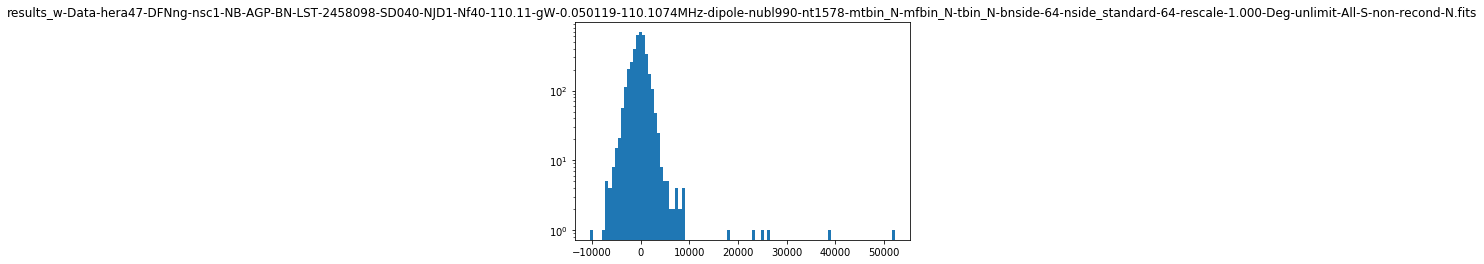

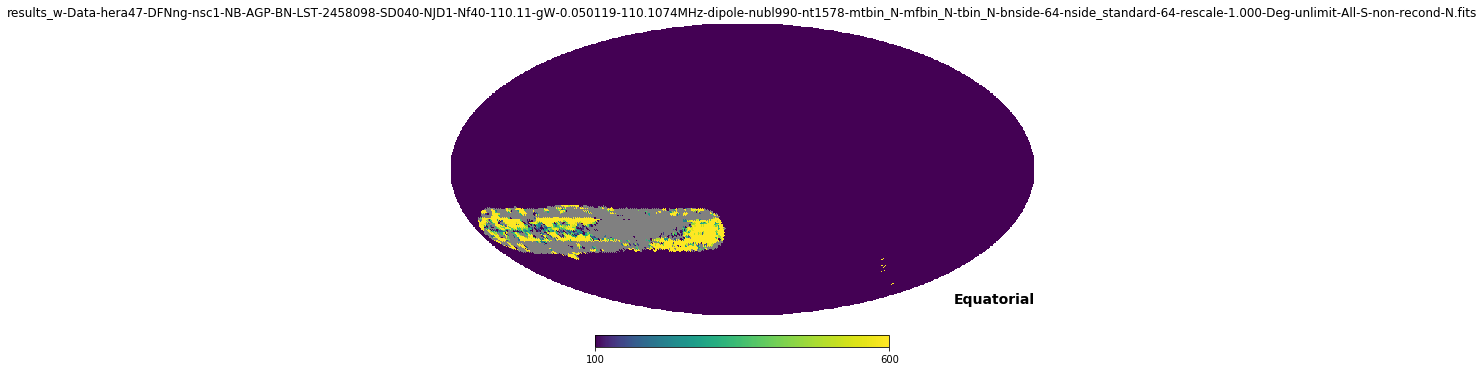

(1, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-114.79-gW-0.050119-114.7949MHz-dipole-nubl990-nt1567-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 2746.11271926
>>>>>>>> Number of Valid Pixels: 3684
>>>>>>>> Maximum in the Map: 58332.3642301


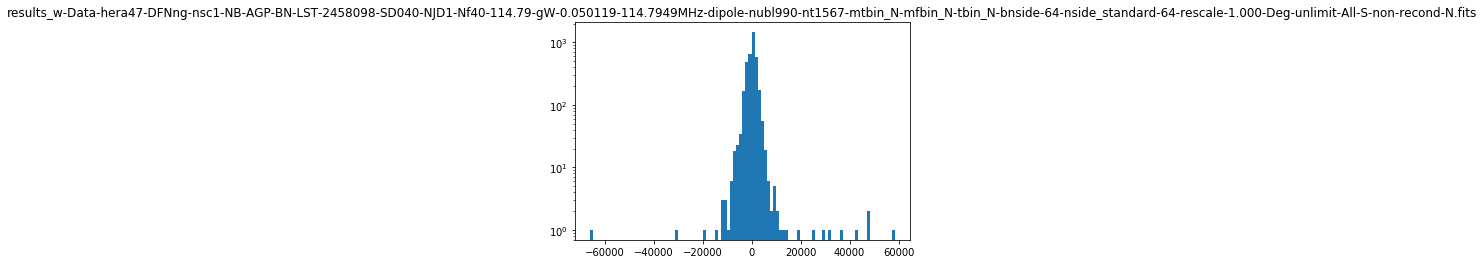

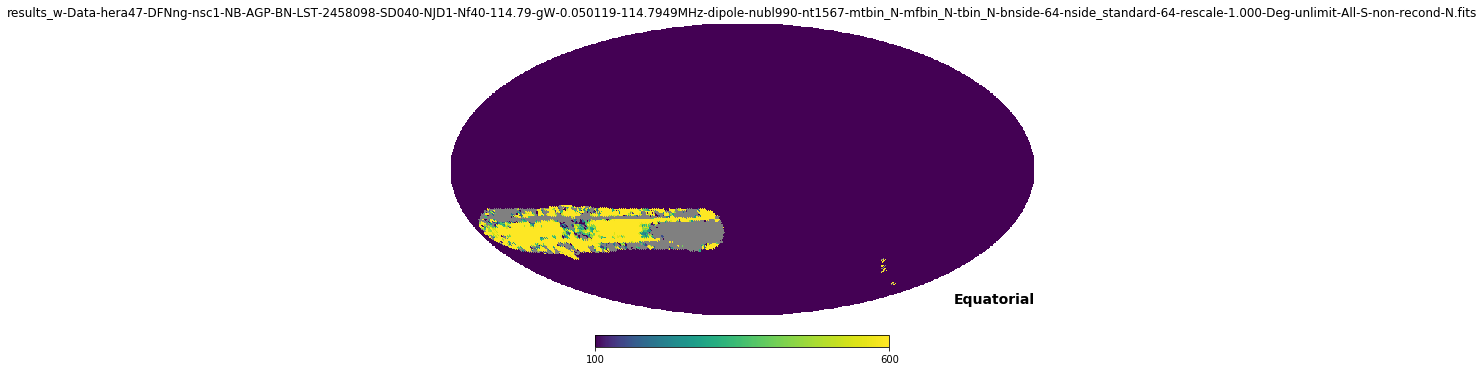

(2, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.050119-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 2029.80496785
>>>>>>>> Number of Valid Pixels: 3169
>>>>>>>> Maximum in the Map: 8524.4694645


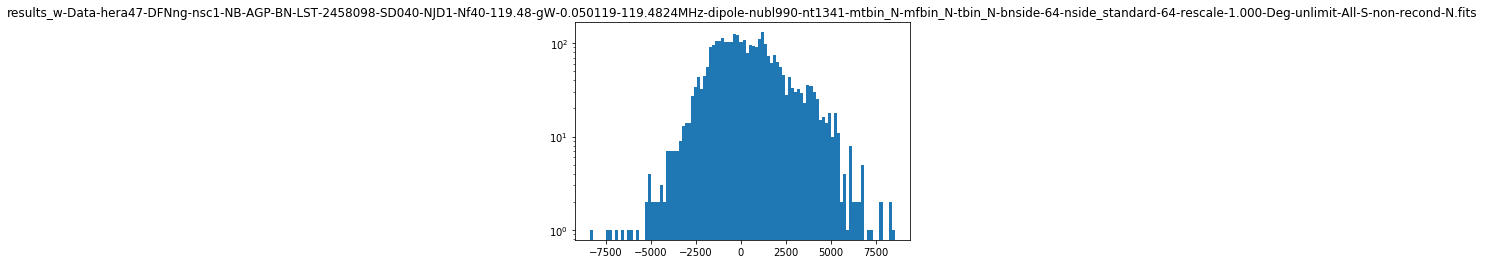

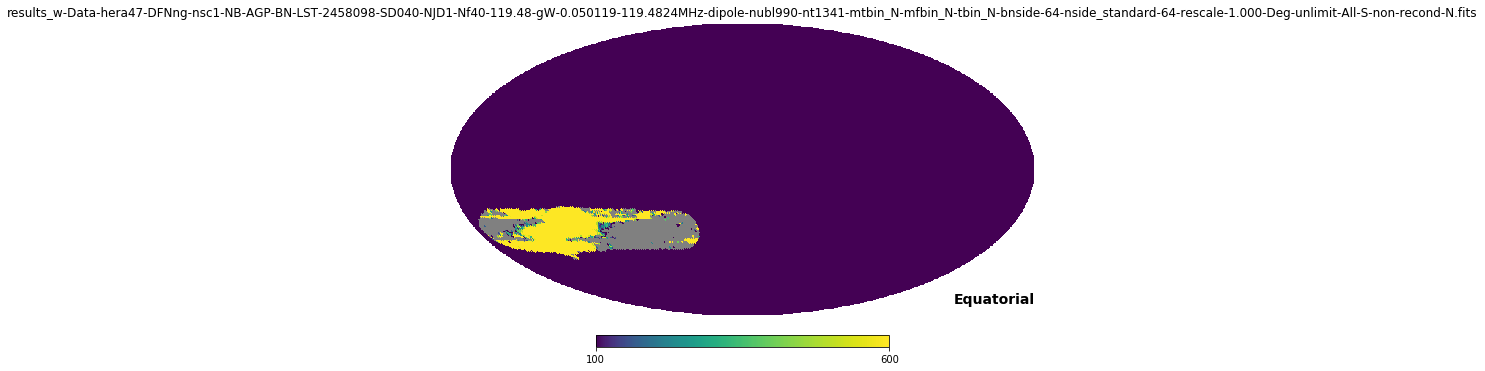

(3, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-125.73-gW-0.050119-125.7324MHz-dipole-nubl990-nt1173-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 1207.14775187
>>>>>>>> Number of Valid Pixels: 2603
>>>>>>>> Maximum in the Map: 4744.70473241


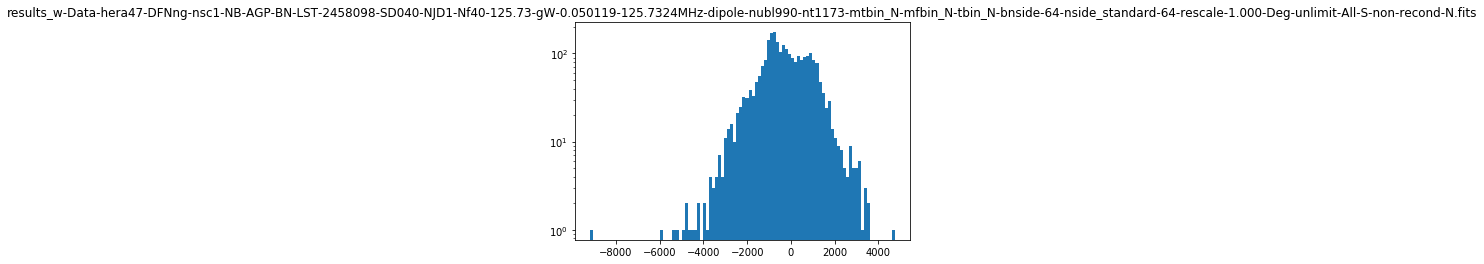

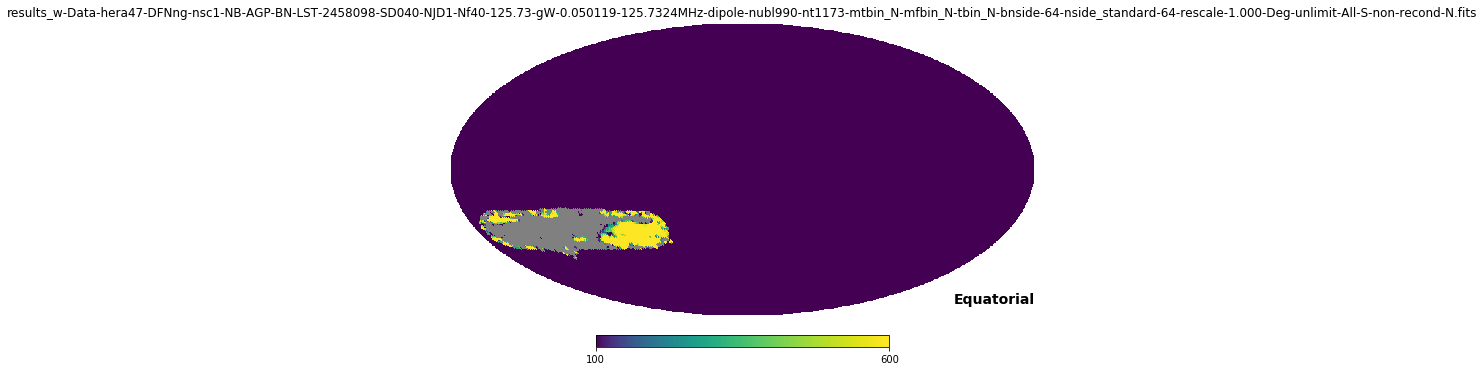

(4, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.050119-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 1008.60400662
>>>>>>>> Number of Valid Pixels: 3282
>>>>>>>> Maximum in the Map: 11905.8177729


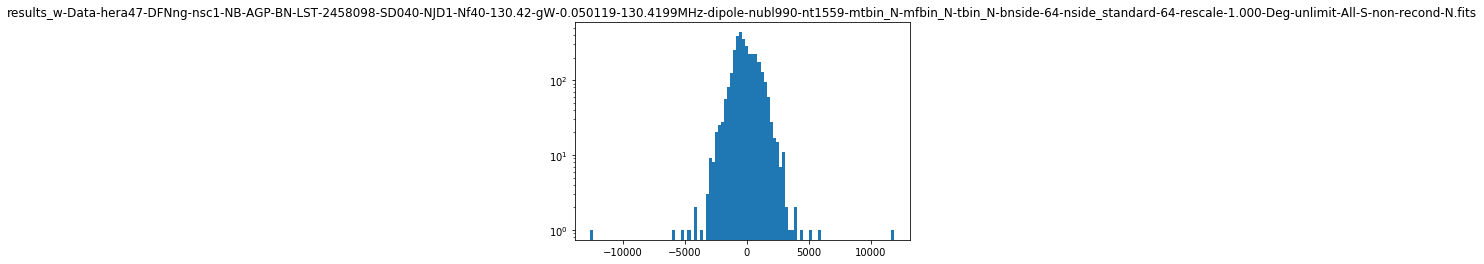

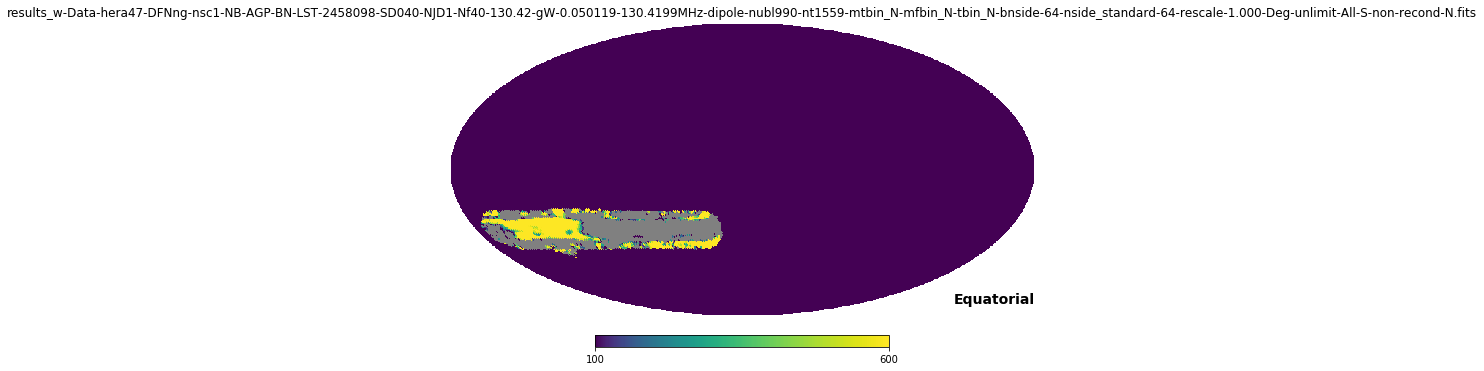

(5, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-135.11-gW-0.050119-135.1074MHz-dipole-nubl990-nt1577-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 1045.736276
>>>>>>>> Number of Valid Pixels: 3211
>>>>>>>> Maximum in the Map: 3860.38439986


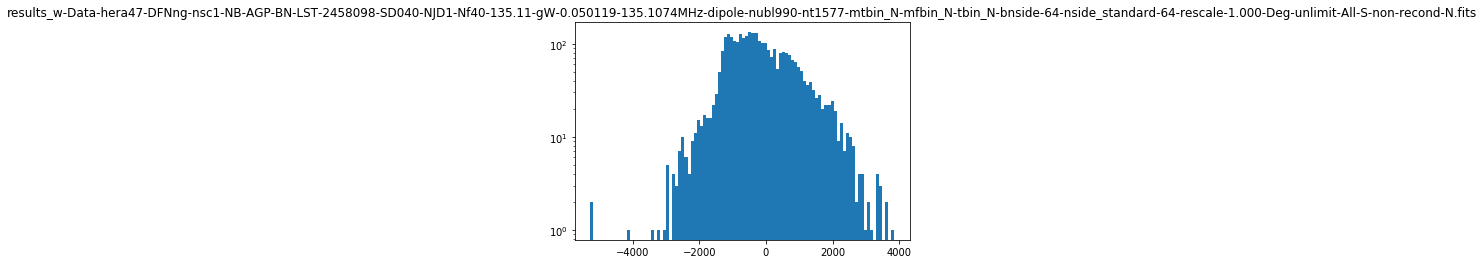

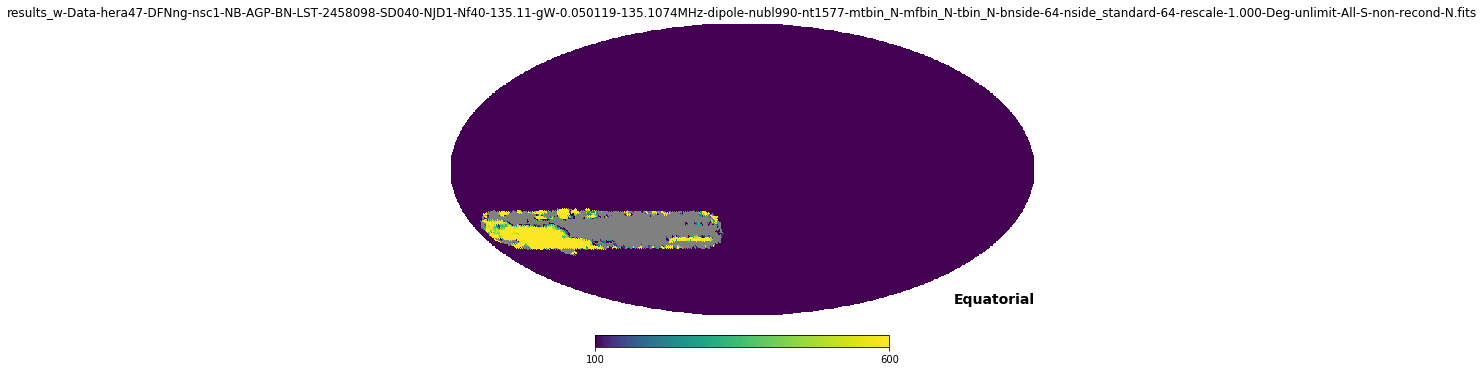

(6, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.050119-139.7949MHz-dipole-nubl990-nt1579-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 831.459564031
>>>>>>>> Number of Valid Pixels: 3064
>>>>>>>> Maximum in the Map: 10432.4366791


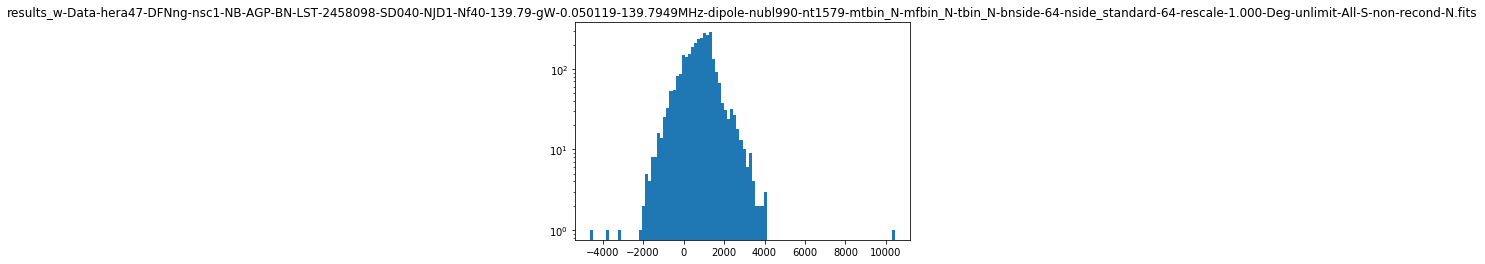

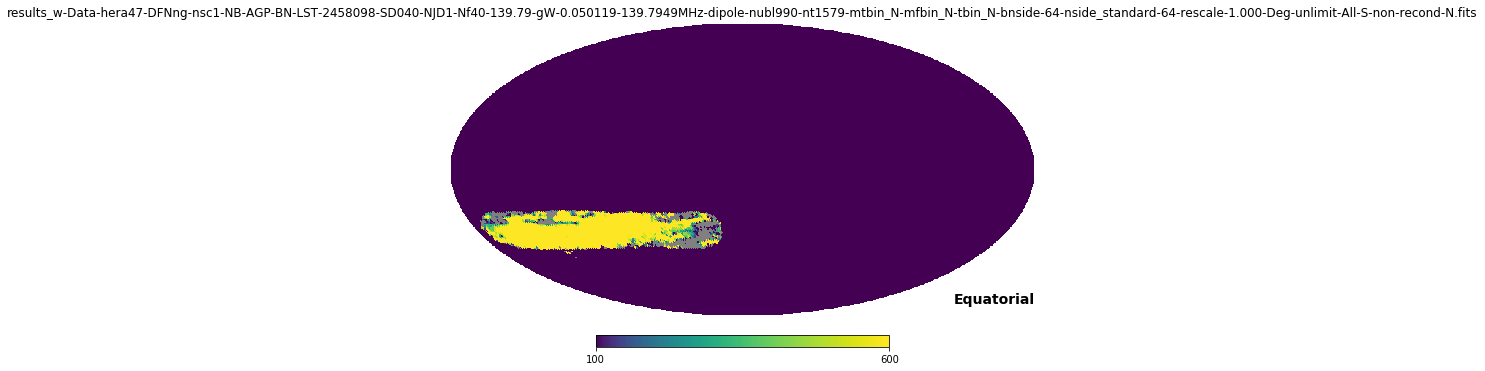

(7, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-144.48-gW-0.050119-144.4824MHz-dipole-nubl990-nt1574-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 738.537840186
>>>>>>>> Number of Valid Pixels: 2907
>>>>>>>> Maximum in the Map: 2726.80930963


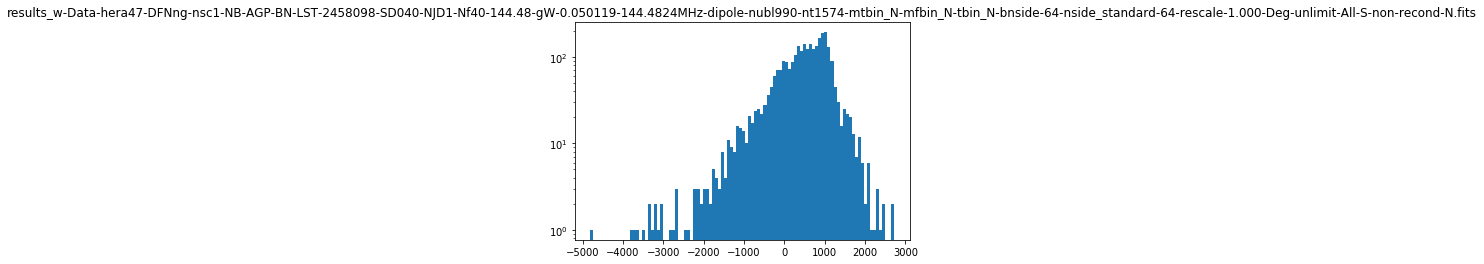

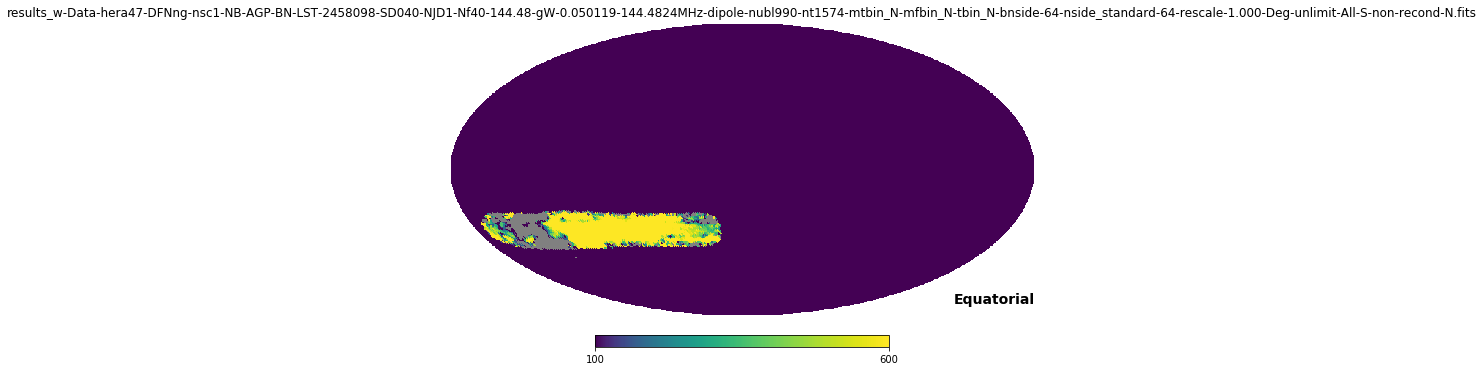

(8, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.050119-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 238.607897281
>>>>>>>> Number of Valid Pixels: 2824
>>>>>>>> Maximum in the Map: 3889.94561464


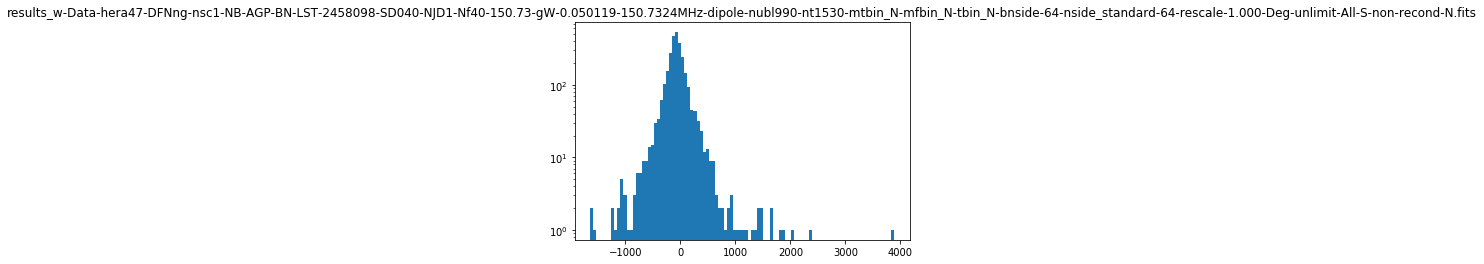

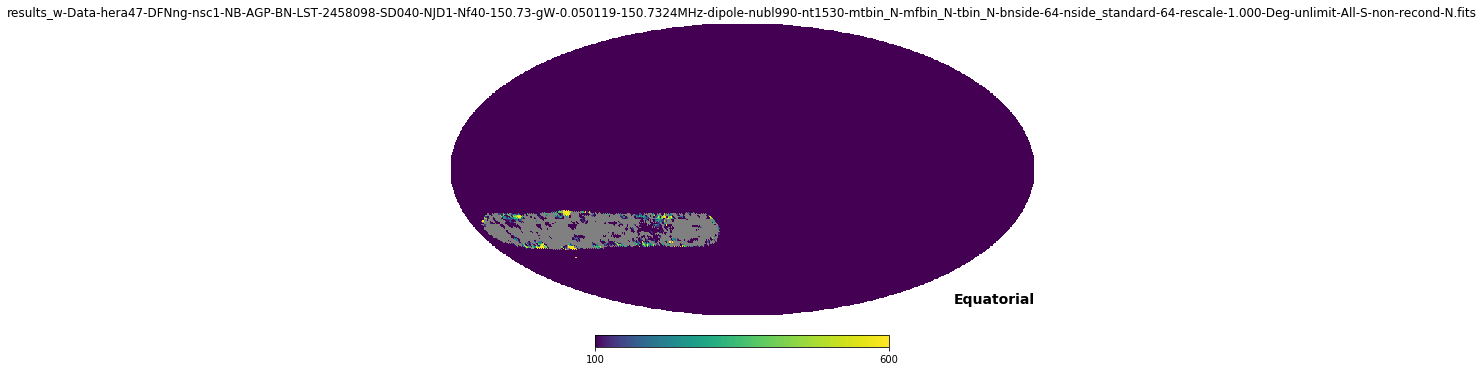

(9, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-155.42-gW-0.050119-155.4199MHz-dipole-nubl990-nt1540-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 253.370346085
>>>>>>>> Number of Valid Pixels: 2803
>>>>>>>> Maximum in the Map: 1914.94464583


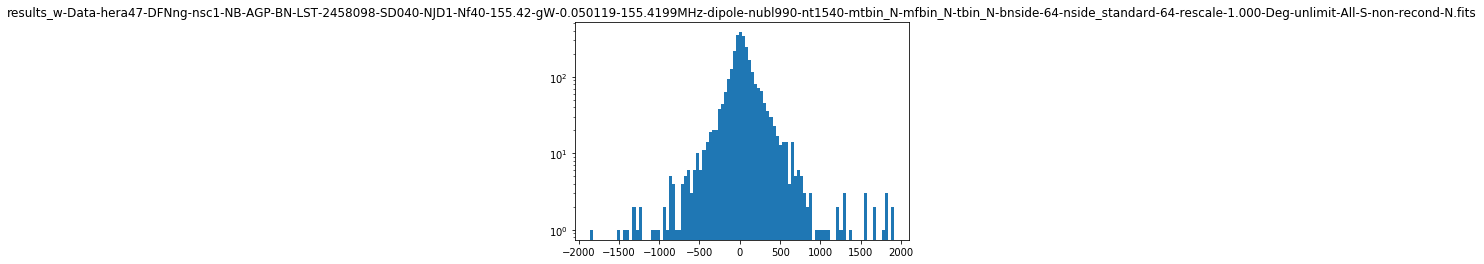

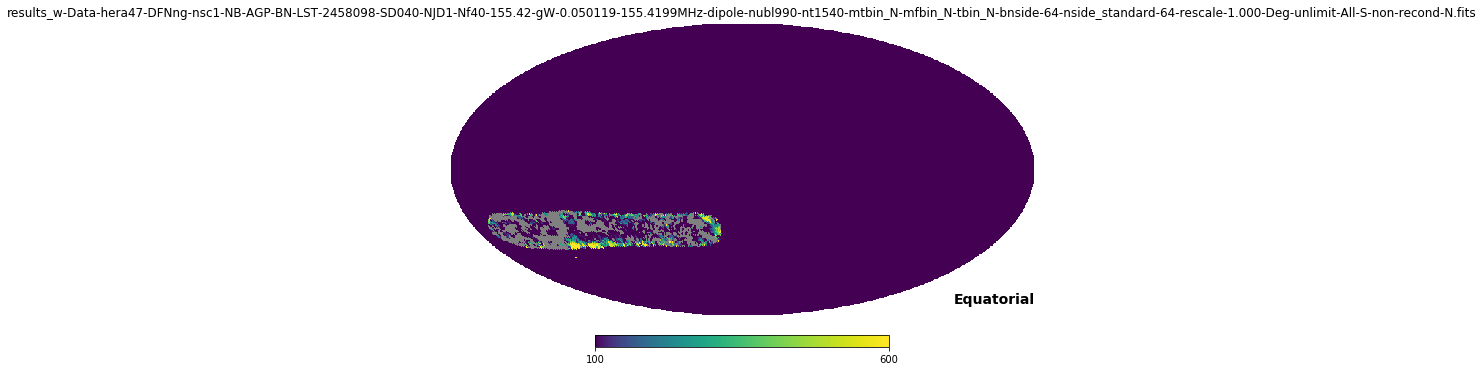

(10, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-160.11-gW-0.050119-160.1074MHz-dipole-nubl990-nt1577-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 198.494580304
>>>>>>>> Number of Valid Pixels: 2856
>>>>>>>> Maximum in the Map: 1818.82820362


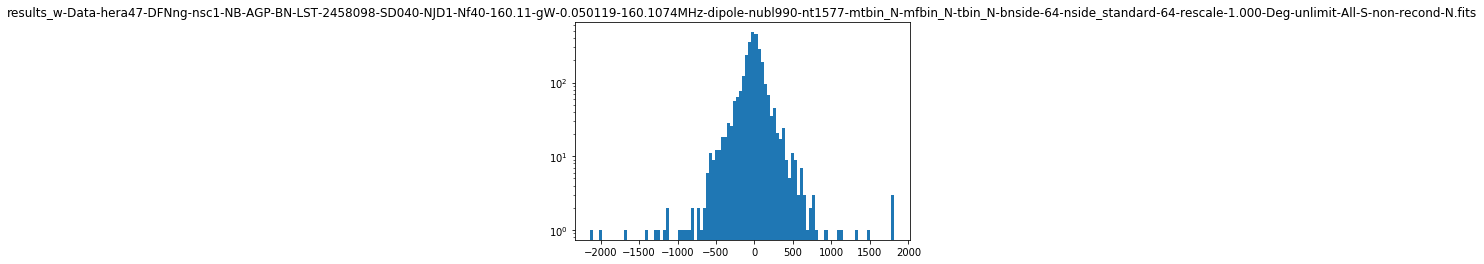

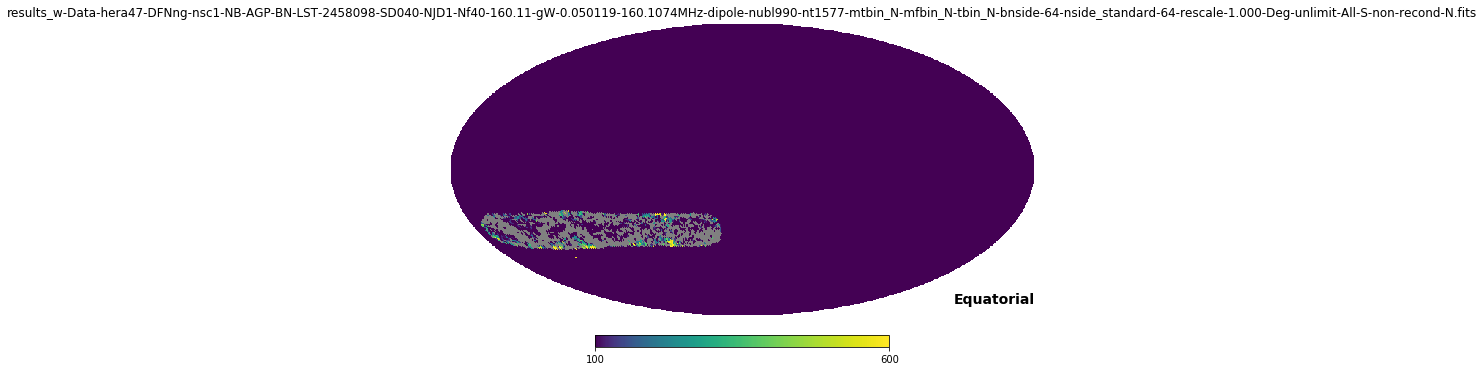

(11, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-164.79-gW-0.050119-164.7949MHz-dipole-nubl990-nt1581-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 248.600634864
>>>>>>>> Number of Valid Pixels: 2775
>>>>>>>> Maximum in the Map: 2851.26375372


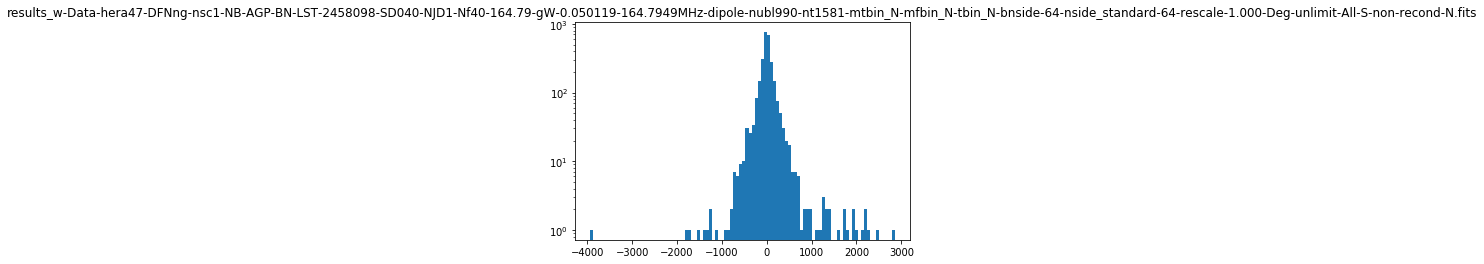

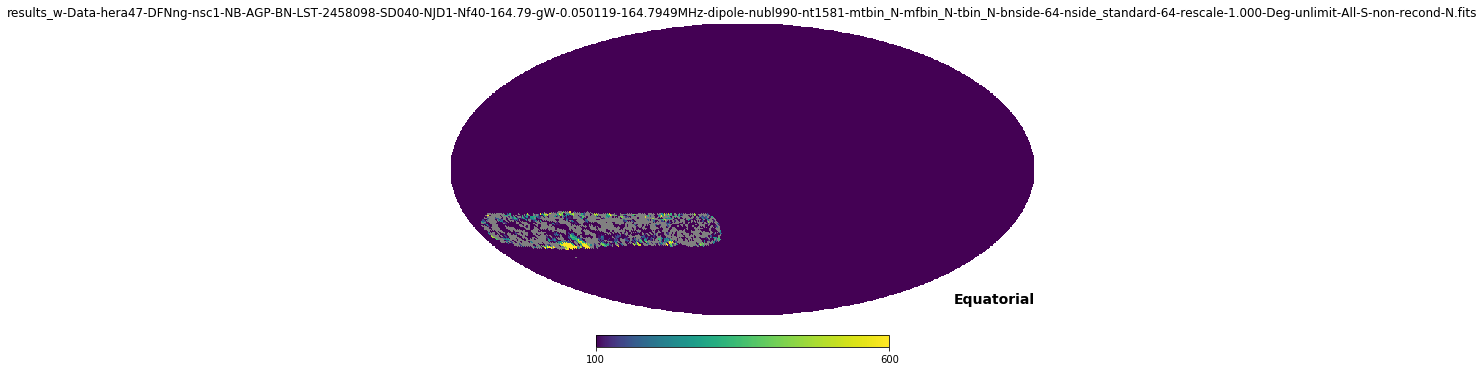

(12, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-171.04-gW-0.050119-171.0449MHz-dipole-nubl990-nt1533-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 199.473125813
>>>>>>>> Number of Valid Pixels: 2565
>>>>>>>> Maximum in the Map: 2538.95006959


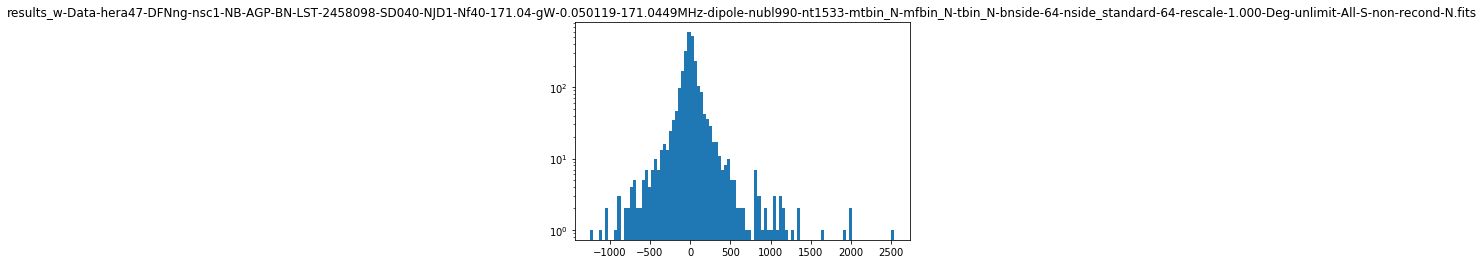

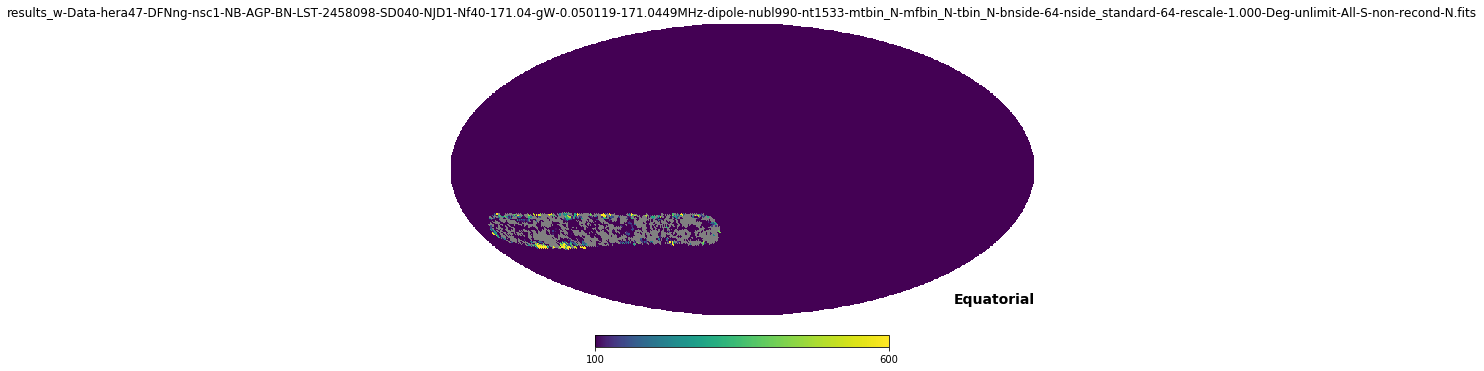

(13, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-174.17-gW-0.050119-174.1699MHz-dipole-nubl990-nt1383-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 246.588088181
>>>>>>>> Number of Valid Pixels: 2370
>>>>>>>> Maximum in the Map: 3015.56488855


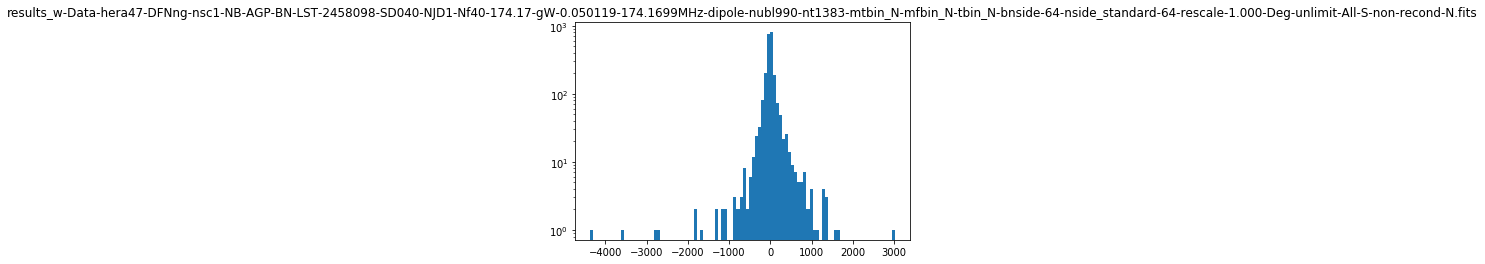

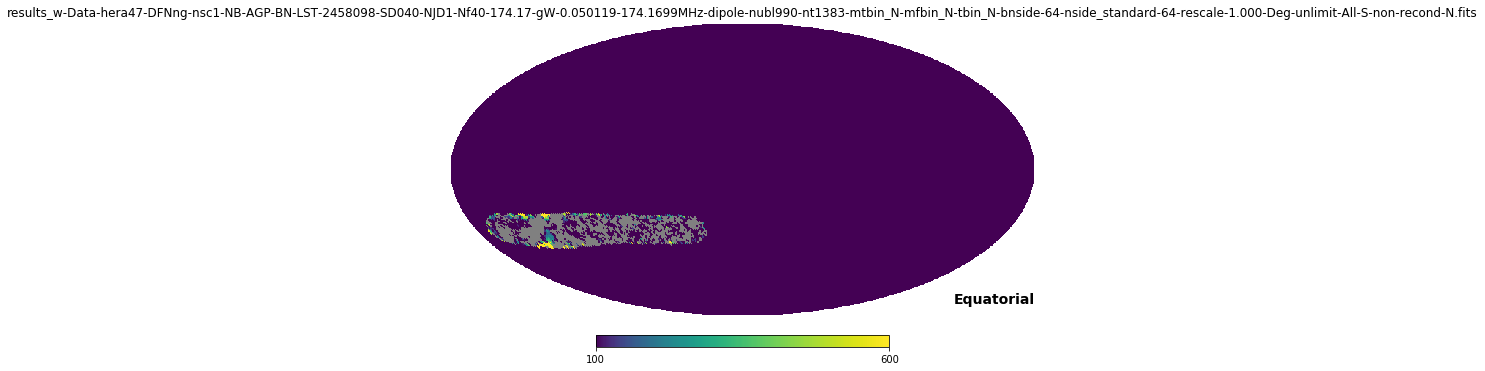

(14, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-178.86-gW-0.050119-178.8574MHz-dipole-nubl990-nt1435-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 134.005316641
>>>>>>>> Number of Valid Pixels: 2450
>>>>>>>> Maximum in the Map: 842.761066073


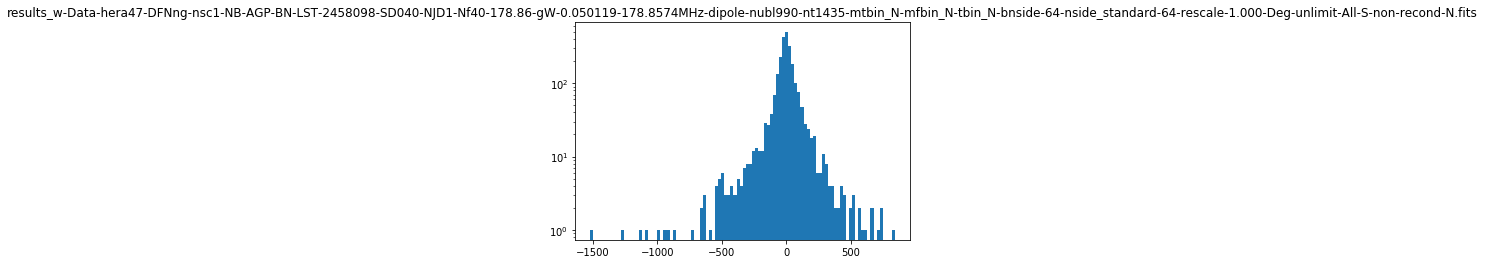

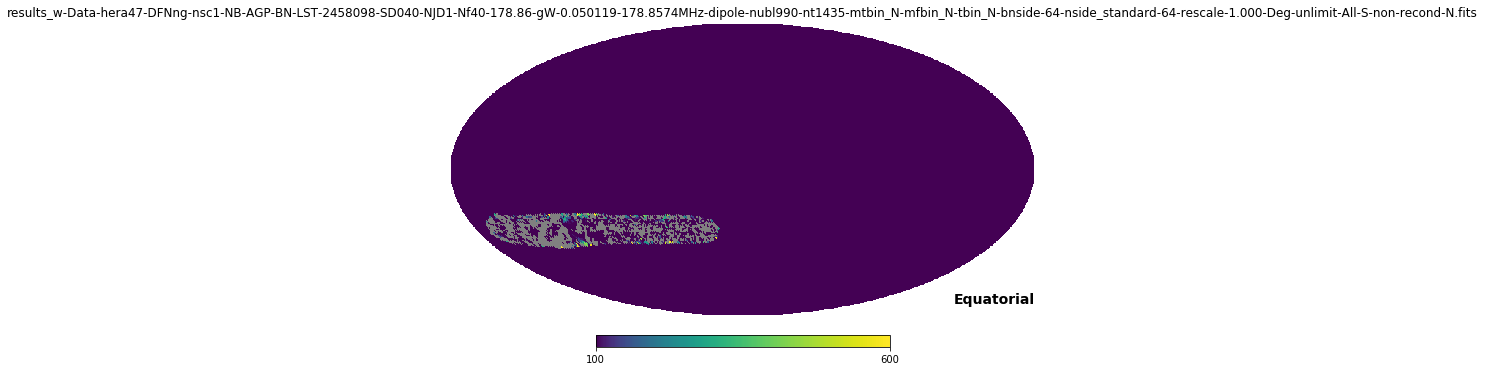

(15, 'results_w-Data-hera47-DFNng-nsc1-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-185.11-gW-0.050119-185.1074MHz-dipole-nubl990-nt1415-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 119.661931793
>>>>>>>> Number of Valid Pixels: 2424
>>>>>>>> Maximum in the Map: 1209.85421473


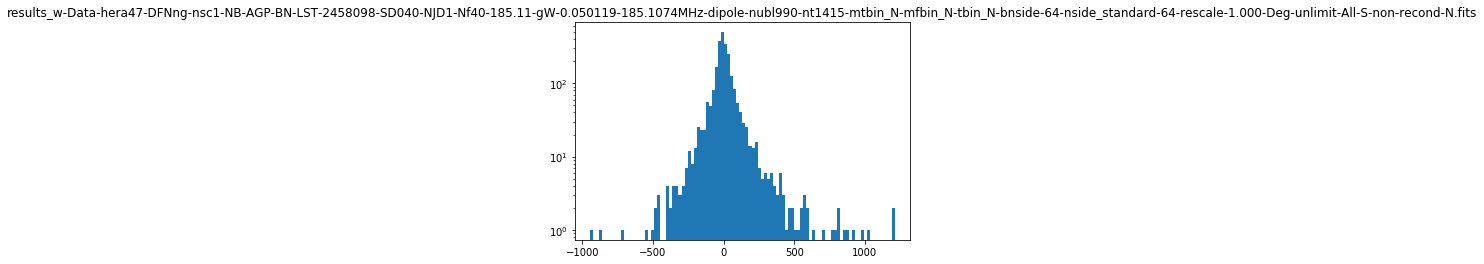

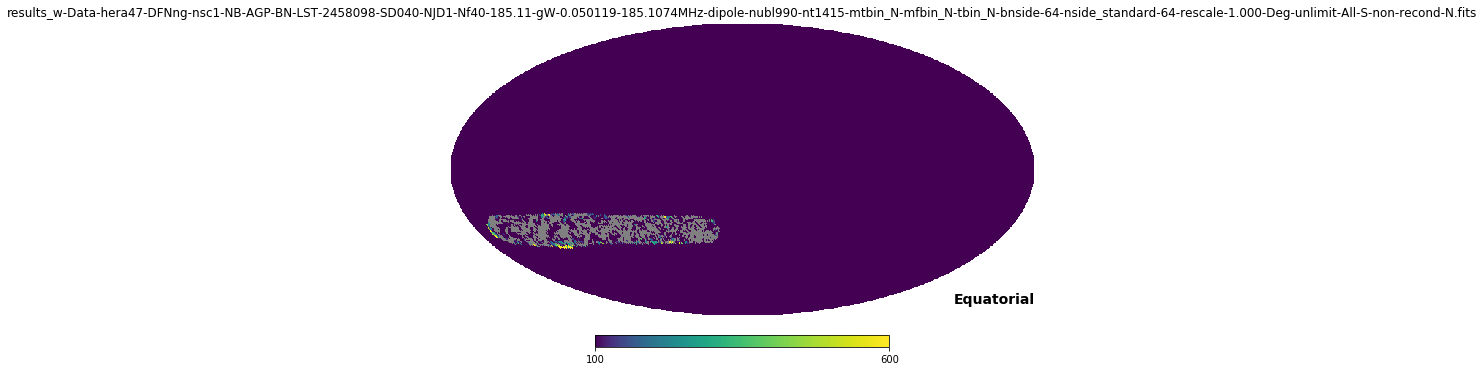

In [30]:
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(100000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(500000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [ ]:
maps_mfreq_64 = []
freqs_common_64 = []
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 1500.:
        maps_mfreq_64.append(map_fit)
        for string_piece in name.split('-'):
            if 'MHz' in string_piece:
                freqs_common_64.append(float(string_piece[:-3]))
                print(string_piece)
        
maps_mfreq_64 = np.array(maps_mfreq_64)
commom_vp_mask_64 = np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64 = maps_mfreq_64[:, commom_vp_mask_64]
print('maps_mfreq_64 shape: {}'.format(maps_mfreq_64.shape))
print('maps_mfreq_common_64 shape: {}'.format(maps_mfreq_common_64.shape))
print('Number of Common Valid Pixels-64: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_64.T)
maps_mfreq_common_64_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_64_eigValues =  pca.explained_variance_
# maps_mfreq_common_64_eigValues = pca.singular_values_
maps_mfreq_common_64_eigVectors = pca.components_
maps_mfreq_common_64_newspace = pca.fit_transform(maps_mfreq_common_64.T)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_64_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_64_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_64_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_newspace.shape))
print('Maps64_Common_NewSpace: {}\n'.format(maps_mfreq_common_64_newspace))

maps_mfreq_common_64_reconstruct = np.dot(maps_mfreq_common_64_newspace, maps_mfreq_common_64_eigVectors).T
print('Shape of maps_mfreq_common_64_reconstruct:{}\n'.format(maps_mfreq_common_64_reconstruct.shape))
Discrepancy_reconstruct_64 = maps_mfreq_common_64 - maps_mfreq_common_64_reconstruct
Discrepancy_reconstruct_ratio_64 = np.linalg.norm(Discrepancy_reconstruct_64, axis=1) / np.linalg.norm(maps_mfreq_common_64, axis=1)
print('Discrepancy_reconstruct_ratio: {}\n'.format(Discrepancy_reconstruct_ratio_64))

ai_64 = np.ones_like(maps_mfreq_common_64_newspace)
Discrepancy_reconstruct_square_64 = np.corrcoef(maps_mfreq_common_64)
for id_pix in range(maps_mfreq_common_64.shape[1]):
    #Discrepancy_reconstruct_square = np.cov(Discrepancy_reconstruct[:, id_pix])
    PtNiPi_64 = np.linalg.inv((maps_mfreq_common_64_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square_64))).dot(maps_mfreq_common_64_eigVectors.T))
    PtNi_64 = maps_mfreq_common_64_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square_64))
    ai_64[id_pix] = PtNiPi_64.dot(PtNi_64.dot(maps_mfreq_common_64[:, id_pix]))
maps_mfreq_common_64_reconstruct_fit = np.dot(ai_64, maps_mfreq_common_64_eigVectors).T
print('Shape of maps_mfreq_common_64_reconstruct_fit:{}\n'.format(maps_mfreq_common_64_reconstruct_fit.shape))
Discrepancy_reconstruct_fit_64 = maps_mfreq_common_64 - maps_mfreq_common_64_reconstruct_fit
Discrepancy_reconstruct_ratio_fit_64 = np.linalg.norm(Discrepancy_reconstruct_fit_64, axis=1) / np.linalg.norm(maps_mfreq_common_64, axis=1)
print('Discrepancy_reconstruct_ratio_fit: {}\n'.format(Discrepancy_reconstruct_ratio_fit_64))
    
from scipy.interpolate import interp1d
from scipy import interpolate
inter_mfreq_cubic_64 = {}
inter_mfreq_cubic_eigVectors_64 = np.ones_like(maps_mfreq_common_64_eigVectors)
freq_shift_64 = 0.
for id_pc in range(maps_mfreq_common_64_eigVectors.shape[0]):
    inter_mfreq_cubic_64[id_pc] = interp1d(np.log(freqs_common_64), maps_mfreq_common_64_eigVectors[id_pc], kind='cubic', fill_value='extrapolate')
    #inter_mfreq_cubic[id_pc] = interpolate.splrep(6. + np.log10(freqs_common), maps_mfreq_common_64_eigVectors[id_pc], s=0)
    inter_mfreq_cubic_eigVectors_64[id_pc] = inter_mfreq_cubic_64[id_pc](np.log(np.array(freqs_common_64) + freq_shift_64))
discrepancy_cubicspline_fit_64 = maps_mfreq_common_64_eigVectors - inter_mfreq_cubic_eigVectors_64
discrepancy_cubicspline_fit_ratio_64 = discrepancy_cubicspline_fit_64 / maps_mfreq_common_64_eigVectors
print('discrepancy_cubicspline_fit_ratio:\n {}\n'.format(discrepancy_cubicspline_fit_ratio_64))
    
id_freq = 7
id_pc = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_eigVectors, axis=1)[:, -10:]))
print('Top pixels {0}th principle component: \n{1}\n'.format(id_pc, np.argsort(maps_mfreq_common_64_newspace[:, id_pc])[-number_to_show:]))
print(np.sort(maps_mfreq_common_64[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_newspace[:, id_pc])[-number_to_show:])

In [ ]:
maps_mfreq_common_64_eigVectors_full = np.ones_like(maps_mfreq_64) * 10**(-5)
maps_mfreq_common_64_eigVectors_full[:, commom_vp_mask_64] = maps_mfreq_common_64_newspace.T
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=100, max=3000, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [ ]:
maps_mfreq_64 = []
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 1250.:
        maps_mfreq_64.append(map_fit)
        
maps_mfreq_64 = np.array(maps_mfreq_64)
commom_vp_mask_64 = np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64 = maps_mfreq_64[:, commom_vp_mask_64]
print('maps_mfreq_64 shape: {}'.format(maps_mfreq_64.shape))
print('maps_mfreq_common_64 shape: {}'.format(maps_mfreq_common_64.shape))
print('Number of Common Valid Pixels-64: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca_64 = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca_64.fit(maps_mfreq_common_64)
maps_mfreq_common_64_eigValues_ratio = pca_64.explained_variance_ratio_
maps_mfreq_common_64_eigValues = pca_64.singular_values_
maps_mfreq_common_64_eigVectors = pca_64.components_
maps_mfreq_common_64_newspace = pca_64.fit_transform(maps_mfreq_common_64)
print('EigenValues_64: \n{}\n'.format(maps_mfreq_common_64_eigValues))
print('EigenValuesRatio_64: \n{}\n'.format(maps_mfreq_common_64_eigValues_ratio))
print('EigenVectorsShape_64: {}\n'.format(maps_mfreq_common_64_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_newspace[id_freq].dot(maps_mfreq_common_64_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_newspace[id_freq].dot(maps_mfreq_common_64_eigVectors))[-number_to_show:])

In [ ]:
maps_mfreq_common_64_eigVectors_full = np.ones_like(maps_mfreq_64) * 10**(-5)
maps_mfreq_common_64_eigVectors_full[:, commom_vp_mask_64] = maps_mfreq_common_64_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [ ]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_64 = fits.getdata(filenames_64[2]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_64[np.argsort(ww_solution_whole_64)[-80:]]))

In [ ]:
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(25000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(65000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [ ]:
maps_mfreq_32_321 = []
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 150.:
        maps_mfreq_32_321.append(map_fit)
        
maps_mfreq_32_321 = np.array(maps_mfreq_32_321)
commom_vp_mask_32_321 = np.prod(np.abs(maps_mfreq_32_321) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32_321 = maps_mfreq_32_321[:, commom_vp_mask_32_321]
print('maps_mfreq_32_321 shape: {}'.format(maps_mfreq_32_321.shape))
print('maps_mfreq_common_32_321 shape: {}'.format(maps_mfreq_common_32_321.shape))
print('Number of Common Valid Pixels-32_321: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32_321) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32_321)
maps_mfreq_common_32_321_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_321_eigValues = pca.singular_values_
maps_mfreq_common_32_321_eigVectors = pca.components_
maps_mfreq_common_32_321_newspace = pca.fit_transform(maps_mfreq_common_32_321)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_321_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_321_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_321_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_321_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_321_newspace))

id_freq = 8
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_321[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_321_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_321_newspace[id_freq].dot(maps_mfreq_common_32_321_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32_321[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_321_newspace[id_freq].dot(maps_mfreq_common_32_321_eigVectors))[-number_to_show:])

maps_mfreq_common_32_321_eigVectors_full = np.ones_like(maps_mfreq_32_321) * 10**(-5)
maps_mfreq_common_32_321_eigVectors_full[:, commom_vp_mask_32_321] = maps_mfreq_common_32_321_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_321_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [ ]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_32 = fits.getdata(filenames_32_321[8]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_32[np.argsort(ww_solution_part_32)[-40:]]))



In [ ]:
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(250000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(650000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [ ]:
maps_mfreq_64_321 = []
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 750.:
        maps_mfreq_64_321.append(map_fit)
        
maps_mfreq_64_321 = np.array(maps_mfreq_64_321)
commom_vp_mask_64_321 = np.prod(np.abs(maps_mfreq_64_321) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64_321 = maps_mfreq_64_321[:, commom_vp_mask_64_321]
print('maps_mfreq_64_321 shape: {}'.format(maps_mfreq_64_321.shape))
print('maps_mfreq_common_64_321 shape: {}'.format(maps_mfreq_common_64_321.shape))
print('Number of Common Valid Pixels-64_321: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64_321) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_64_321)
maps_mfreq_common_64_321_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_64_321_eigValues = pca.singular_values_
maps_mfreq_common_64_321_eigVectors = pca.components_
maps_mfreq_common_64_321_newspace = pca.fit_transform(maps_mfreq_common_64_321)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_64_321_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_64_321_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_64_321_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_321_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_321_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_321[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_321_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_321_newspace[id_freq].dot(maps_mfreq_common_64_321_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64_321[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_321_newspace[id_freq].dot(maps_mfreq_common_64_321_eigVectors))[-number_to_show:])

maps_mfreq_common_64_321_eigVectors_full = np.ones_like(maps_mfreq_64_321) * 10**(-5)
maps_mfreq_common_64_321_eigVectors_full[:, commom_vp_mask_64_321] = maps_mfreq_common_64_321_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_321_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [ ]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_64 = fits.getdata(filenames_64_321[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_64[np.argsort(ww_solution_part_64)[-80:]]))




In [ ]:
for id_file, fitfile in enumerate(filenames_32_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(35000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(75000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [ ]:
maps_mfreq_32_415 = []
for id_file, fitfile in enumerate(filenames_32_415):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 100.:
        maps_mfreq_32_415.append(map_fit)
        
maps_mfreq_32_415 = np.array(maps_mfreq_32_415)
commom_vp_mask_32_415 = np.prod(np.abs(maps_mfreq_32_415) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32_415 = maps_mfreq_32_415[:, commom_vp_mask_32_415]
print('maps_mfreq_32_415 shape: {}'.format(maps_mfreq_32_415.shape))
print('maps_mfreq_common_32_415 shape: {}'.format(maps_mfreq_common_32_415.shape))
print('Number of Common Valid Pixels-32_415: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32_415) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32_415)
maps_mfreq_common_32_415_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_415_eigValues = pca.singular_values_
maps_mfreq_common_32_415_eigVectors = pca.components_
maps_mfreq_common_32_415_newspace = pca.fit_transform(maps_mfreq_common_32_415)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_415_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_415_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_415_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_415_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_415_newspace))

id_freq = 8
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_415[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_415_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_415_newspace[id_freq].dot(maps_mfreq_common_32_415_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32_415[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_415_newspace[id_freq].dot(maps_mfreq_common_32_415_eigVectors))[-number_to_show:])

maps_mfreq_common_32_415_eigVectors_full = np.ones_like(maps_mfreq_32_415) * 10**(-5)
maps_mfreq_common_32_415_eigVectors_full[:, commom_vp_mask_32_415] = maps_mfreq_common_32_415_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_415_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [ ]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_32 = fits.getdata(filenames_32_415[3]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_32[np.argsort(ww_solution_part415_32)[-40:]]))




In [ ]:
for id_file, fitfile in enumerate(filenames_64_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(350000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(750000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [ ]:
maps_mfreq_64_415 = []
for id_file, fitfile in enumerate(filenames_64_415):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 500.:
        maps_mfreq_64_415.append(map_fit)
        
maps_mfreq_64_415 = np.array(maps_mfreq_64_415)
commom_vp_mask_64_415 = np.prod(np.abs(maps_mfreq_64_415) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64_415 = maps_mfreq_64_415[:, commom_vp_mask_64_415]
print('maps_mfreq_64_415 shape: {}'.format(maps_mfreq_64_415.shape))
print('maps_mfreq_common_64_415 shape: {}'.format(maps_mfreq_common_64_415.shape))
print('Number of Common Valid Pixels-64_415: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64_415) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_64_415)
maps_mfreq_common_64_415_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_64_415_eigValues = pca.singular_values_
maps_mfreq_common_64_415_eigVectors = pca.components_
maps_mfreq_common_64_415_newspace = pca.fit_transform(maps_mfreq_common_64_415)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_64_415_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_64_415_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_64_415_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_415_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_415_newspace))

id_freq = 5
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_415[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_415_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_415_newspace[id_freq].dot(maps_mfreq_common_64_415_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64_415[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_415_newspace[id_freq].dot(maps_mfreq_common_64_415_eigVectors))[-number_to_show:])

maps_mfreq_common_64_415_eigVectors_full = np.ones_like(maps_mfreq_64_415) * 10**(-5)
maps_mfreq_common_64_415_eigVectors_full[:, commom_vp_mask_64_415] = maps_mfreq_common_64_415_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_415_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [ ]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_64 = fits.getdata(filenames_64_415[5]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_64[np.argsort(ww_solution_part415_64)[-80:]]))





In [ ]:
# GSM map with two degrees resolution
GSM32_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits'
hdul = fits.open(GSM32_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM32_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

In [ ]:
# GSM map with 1 degree resolution
GSM64_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM64_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

In [ ]:
# GSM map with 1 degree resolution
GSM128_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard128-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM128_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 128
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))